# Compare U87MG motility in different cases 

This notebook conains much more than the figures of the paper, for those check`generate_figures.ipynb` 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../utils')
from track_fns import *

import numpy as np
from matplotlib import pyplot as plt
from LineageTree import lineageTree
import scipy.stats as stats
import xml.etree.ElementTree as ET
import os
# fix for ete 
os.environ['QT_QPA_PLATFORM']='offscreen'
from ete3 import TreeStyle,NodeStyle
plt.rcParams.update({'font.size': 18})

# Load all necessary data

01_Control-1_2705.xml
time step: 1799.967041015625 sec pixel size: [0.66917518 0.66917518] um
removed 1 spurious tracks
#tracks: 281, ( 9 <  5 timepoints)


In [64]:
# Load tracks 
print('Exp 22'.center(40,'-'))
dat22_500um,tree22_500um = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_6_500TMZ_U87MG.xml')
dat22_control,tree22_control = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_1_control_U87MG_3.xml')

dat22_hela_500um,tree22_hela_500um = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_12_500TMZ_Helarestored5.xml')
dat22_hela_control,tree22_hela_control = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_7_control_Hela.xml')
print('Exp 33'.center(40,'-'))

dat33_500um,tree33_500um = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/04_500umalltime-1_new_new_final.xml')
#dat33_control,tree33_control = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/01_Control-1_2705.xml')
dat33_control,tree33_control = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/01_Control-1_2705.xml',remove_spurious=False)
dat33_10um,tree33_10um = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/03_10umalltime6.xml')

print('Exp 40'.center(40,'-'))

dat40_500um,tree40_500um = track_to_coords('/mnt/dioscuri-nas2/Pragyesh/40PD_U87MG_mgmt-OFP_cells_with_filtered_media/For_tracking/well_7_corrected_crop_500uM_TMZ.xml')
dat40_control,tree40_control = track_to_coords('/mnt/dioscuri-nas2/Pragyesh/40PD_U87MG_mgmt-OFP_cells_with_filtered_media/For_tracking/well_4_corrected_crop_control.xml')

print('Exp 54'.center(40,'-'))

# 54 C6
#dat54_control,tree54_control = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_C6_control3.xml')
dat54_control_high,tree54_control_high = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_C6_control3_high.xml')
dat_fluo54_control_high = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/processed/well_C6_control3_high_fluo_dat.bin',None)
dat54_control_low,tree54_control_low = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_C6_non_fluorescent5.xml')
dat_fluo54_control_low = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/processed/well_C6_non_fluorescent5_fluo_dat.bin',None)

#54 F6 
dat54_500um_high,tree54_500um_high = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_F6_TMZ5_high4.xml')
dat_fluo54_500um_high = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/processed/well_F6_TMZ5_high4_fluo_dat.bin',None)
dat54_500um_low,tree54_500um_low = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_F6_TMZ_non_fluorscent2.xml')
dat_fluo54_500um_low = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/processed/well_F6_TMZ_non_fluorscent2_fluo_dat.bin',None)



# And the fluorescence data 
#dat_fluo40_500um = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/40PD_well7_all_cells_imgs_w_fit_bg_new.bin',None)
#dat_fluo40_control = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/40PD_well4_all_cells_imgs_w_fit_bg_new.bin',None)

#dat_fluo54_500um_high = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/processed/well_F6_TMZ5_high4_fluo_dat.bin',None)

print('Exp 54 (bis)'.center(40,'-'))
# 54 F5 
dat54_500um_high_F5,tree54_500um_high_F5 = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_F5_TMZ_high5.xml')
dat_fluo54_500um_high_F5 = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/processed/well_F5_TMZ_high5_fluo_dat.bin',None)
dat54_500um_low_F5,tree54_500um_low_F5 = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_F5_TMZ_low8.xml')
dat_fluo54_500um_low_F5 = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/processed/well_F5_TMZ_low8_fluo_dat.bin',None)
dat54_control_high_C5,tree54_control_high_C5 = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_C5_control_high3.xml')
dat_fluo54_control_high_C5 = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/processed/well_C5_control_high3_fluo_dat.bin',None)


-----------------Exp 22-----------------
well_6_500TMZ_U87MG.xml
time step: 10.0 min pixel size: [1.33200133 1.33200133] um
removed 0 spurious tracks
#tracks: 27, ( 0 <  5 timepoints)
well_1_control_U87MG_3.xml
time step: 10.0 min pixel size: [1.33200133 1.33200133] um
removed 1 spurious tracks
#tracks: 149, ( 1 <  5 timepoints)
well_12_500TMZ_Helarestored5.xml
time step: 10.0 min pixel size: [1.33200133 1.33200133] um
removed 163 spurious tracks
#tracks: 65, ( 0 <  5 timepoints)
well_7_control_Hela.xml
time step: 10.0 min pixel size: [1.33200133 1.33200133] um
removed 0 spurious tracks
#tracks: 112, ( 5 <  5 timepoints)
-----------------Exp 33-----------------
04_500umalltime-1_new_new_final.xml
time step: 1799.86767578125 sec pixel size: [0.66917518 0.66917518] um
removed 0 spurious tracks
#tracks: 181, ( 2 <  5 timepoints)
01_Control-1_2705.xml
time step: 1799.967041015625 sec pixel size: [0.66917518 0.66917518] um
#tracks: 282, ( 10 <  5 timepoints)
03_10umalltime6.xml
time step: 1

# Plot tracks

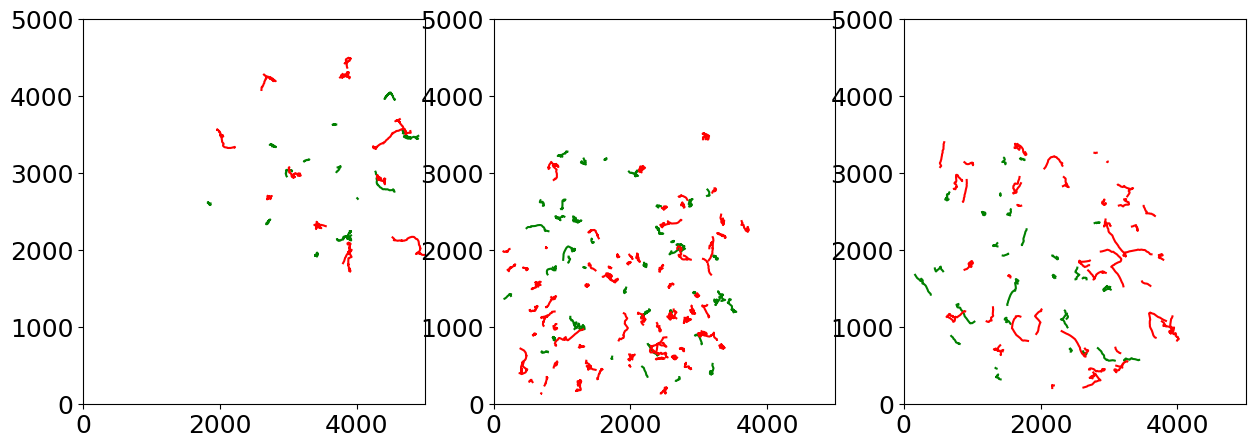

In [4]:
#fig, ax = plt.subplots()

# for pos,time,_ in zip(*dat54_500um_low): 
#     ax.plot(pos[:,0],pos[:,1],color='red')
# for pos,time,_ in zip(*dat54_500um_high): 
#     ax.plot(pos[:,0],pos[:,1],color='green')
# for pos,time,_ in zip(*dat54_control_high): 
#     ax.plot(pos[:,0],pos[:,1],color='purple')
# for pos,time,_ in zip(*dat54_control_low): 
#     ax.plot(pos[:,0],pos[:,1],color='blue')    
#tmp,_ = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/')
#tmp,_ = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/04_500umalltime-1_new_final5.xml')

fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('green','red') ):
        #pos, _, _ = dat
        for pos,time,_ in zip(*dat):
            cnd = time < 1000
            ax[i].plot(pos[cnd,0],pos[cnd,1],color=color,alpha= 1)

        ax[i].set_xlim(0,5000)
        ax[i].set_ylim(0,5000)
    #     ax[i].hist(get_max_displacement(dat),color=color,label=lab,density=True,alpha=0.5)
    # ax[i].legend()
    # ax[i].set_title(exp_label)
    # ax[i].set_xlabel('um')
    # ax[i].set_ylabel('prob')
    


# for pos,time,_ in zip(*dat33_500um): 
#     ax.plot(pos[:,0],pos[:,1],color='green',alpha=0.3)
# for pos,time,_ in zip(*dat33_control):
#     ax.plot(pos[:,0],pos[:,1],color='red',alpha=0.3)
#display(fig)
#plt.ion()

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/matplotlib/axes/_axes.py:4411: UserWarning: Warning: converting a masked element to nan.
  c = np.asanyarray(c, dtype=float)


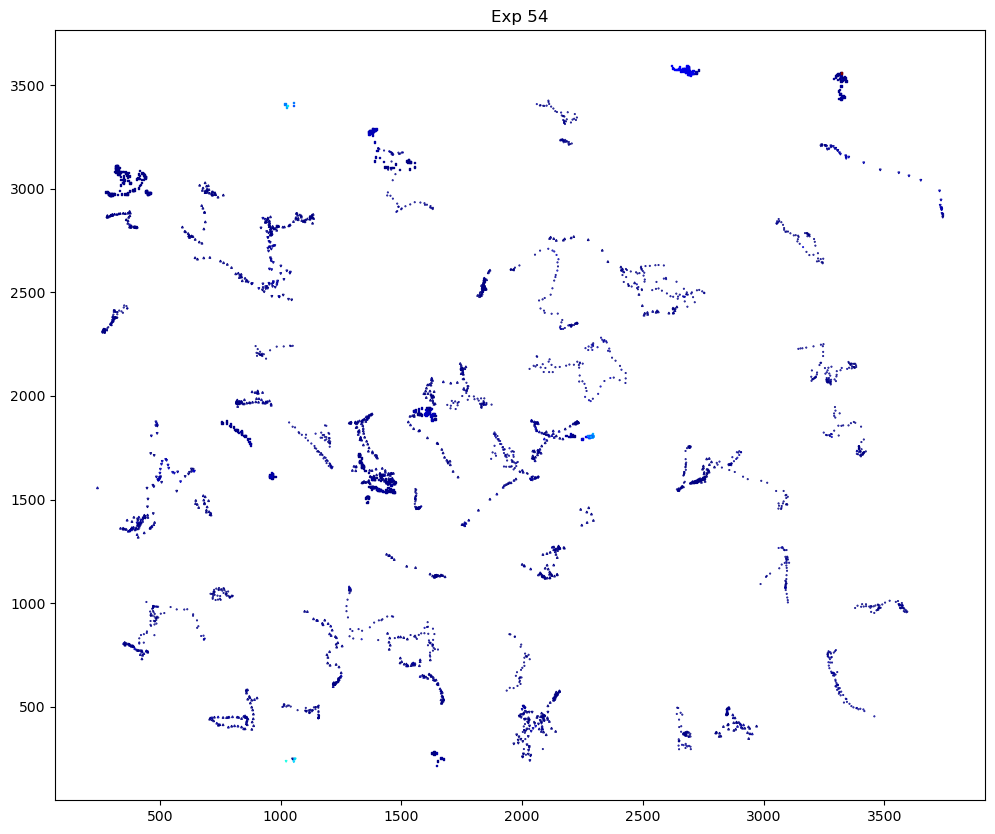

In [6]:
fig,ax = plt.subplots(1,figsize=(12,10))#,figsize=(15,5))
exp_label = 'Exp 54'
ax.set_title(exp_label)

from scipy.stats import pearsonr
max_fluo,min_fluo = 0,0 
fluo_exp = [] 
for dat,fluo in zip((dat54_control_low,dat54_control_high,dat54_500um_low,dat54_500um_high),
                    (dat_fluo54_control_low,dat_fluo54_control_high,dat_fluo54_500um_low,dat_fluo54_500um_high)):
    #avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    #avg_fluo = get_avg_fluo_track(dat,fluo_by_node)
    fluo_tracks = get_fluo_track(dat,fluo_by_node)
    max_fluo = max(np.nanmax(np.concatenate(fluo_tracks)),max_fluo)
    min_fluo = max(np.nanmin(np.concatenate(fluo_tracks)),min_fluo)
    fluo_exp.append(fluo_tracks)
    
for dat,fluo_tracks,lab,marker in zip((dat54_control_low,dat54_control_high,dat54_500um_low,dat54_500um_high),
                             #(tree54_control,tree54_control_high,tree54_500um,tree54_500um_high),
                             #(dat_fluo54_control,dat_fluo54_control_high,dat_fluo54_500um,dat_fluo54_500um_high),
                             fluo_exp,
                             ('control','control HF','500um','500um HF'),
                             ('.','v','^','s')):
  
    #fluo_by_node = get_fluo_by_node(fluo)
    #fluo_track = get_fluo_track(dat,fluo_by_node)
    for pos,_,_,c in zip(*dat,fluo_tracks):
        sc = ax.scatter(pos[:,0],pos[:,1],s=1.0,marker=marker,c=c,
                        vmin=min_fluo,vmax=max_fluo,
                        cmap='jet') 

#ax.legend(prop= {'size'   : 10})
#cbar = plt.colorbar(sc)
#cbar.ax.tick_params(labelsize=10)
#ax.set_xscale('log')
#plt.savefig('fluo_vs_lifetime_exp54.pdf',bbox_inches='tight')

# Speed histogram

average speed Exp22,control: 0.6137224104198247
average speed Exp22,500um: 0.8040599489082161
average speed Exp 33,control: 0.2534404929488398
average speed Exp 33,500um: 0.45143133732388196
average speed Exp40,control: 0.2928290146613525
average speed Exp40,500um: 0.38870489875061986


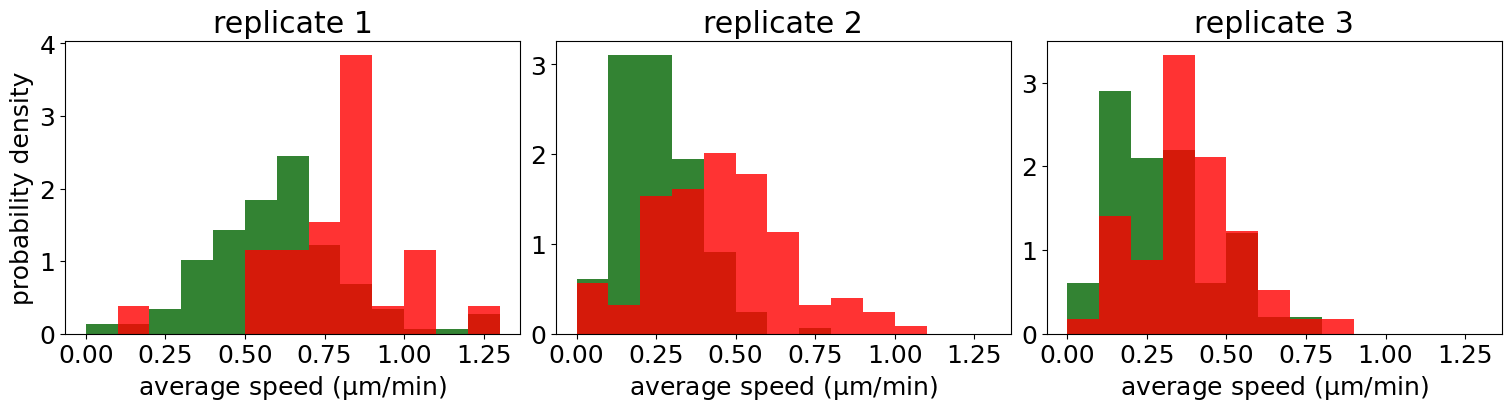

In [755]:
fig,ax = plt.subplots(1,3,figsize=(15,4),layout='constrained')

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control,),  (dat22_500um,dat33_500um,dat40_500um,dat22_hela_500um,),('Exp22','Exp 33','Exp40',))):
    for dat,lab,color in zip((control,treated),('control','500um'),('darkgreen','red') ):
        ax[i].hist(get_avg_speed(dat),color=color,label=lab,density=True,alpha=0.8,bins=np.arange(0,1.4,0.1))
        print(f'average speed {exp_label},{lab}: {np.nanmean(get_avg_speed(dat))}')
    #ax[i].legend()
    ax[i].set_title(f'replicate {i+1}')
    ax[i].set_xlabel('average speed ($\mathrm{\mu}$m/min)')
    ax[0].set_ylabel('probability density')
plt.savefig('/mnt/dioscuri-nas/Ilyas/distributions_avg_speed_22-33-40.svg')#,bbox_inches='tight')

## For hela

average speed Exp22 hela,control: 0.2035308224230026
average speed Exp22 hela,500um: 0.17142101316467817


/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


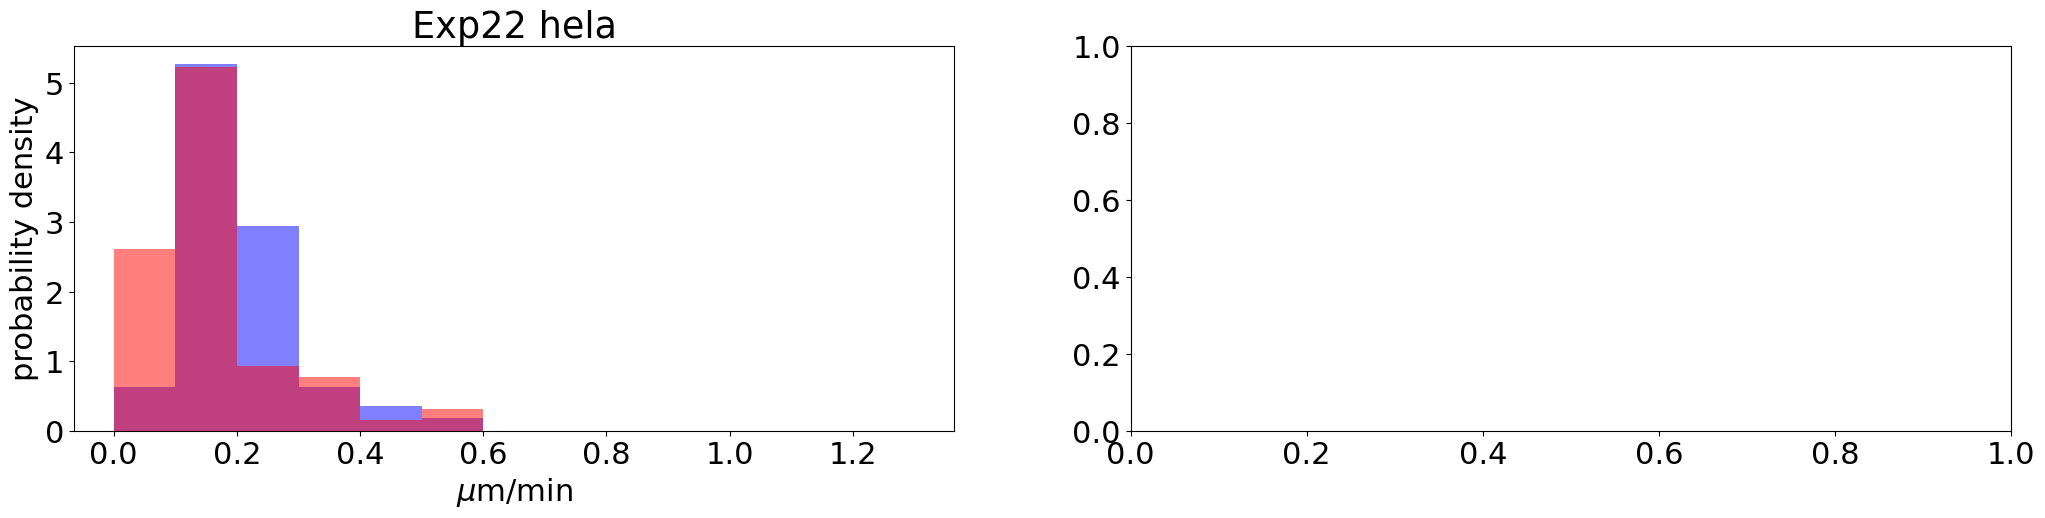

In [20]:
fig,ax = plt.subplots(1,2,figsize=(25,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_hela_control,),  (dat22_hela_500um,),('Exp22 hela','Exp 33','Exp40','Exp54'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        ax[i].hist(get_avg_speed(dat),color=color,label=lab,density=True,alpha=0.5,bins=np.arange(0,1.4,0.1))
        print(f'average speed {exp_label},{lab}: {np.nanmean(get_avg_speed(dat))}')
    #ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('$\mu$m/min')
    ax[i].set_ylabel('probability density')
#plt.savefig('distributions_avg_speed_22-33-40.pdf',bbox_inches='tight')

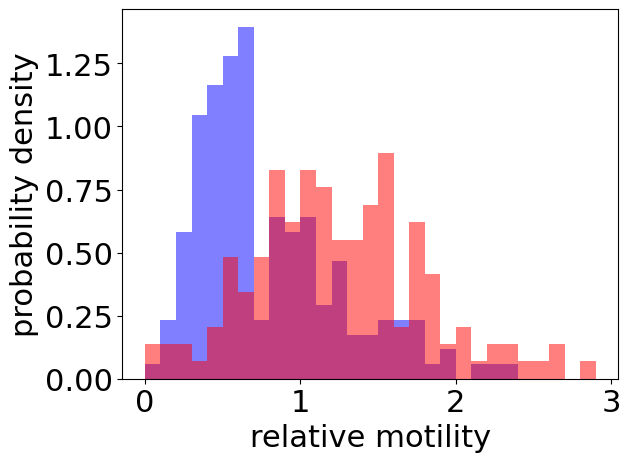

In [6]:

# pool 
fig,ax = plt.subplots()
control_dat = [get_avg_speed(z) for z in (dat33_control,dat40_control)]
tmz_dat = [get_avg_speed(z) for z in (dat33_500um,dat40_500um)]
means = [np.nanmean(np.concatenate((x,y))) for x,y in zip(control_dat,tmz_dat) ]

control_dat = [x[x> 0]/y for x,y in zip(control_dat,means)]
tmz_dat = [x[x>0]/y for x,y in zip(tmz_dat,means)]

ax.hist(np.concatenate(control_dat),color='blue',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
ax.hist(np.concatenate(tmz_dat),color='red',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
#ax.legend()
ax.set_xlabel('relative speed')
ax.set_ylabel('probability density')
plt.savefig('distributions_avg_speed_cumulated.pdf',bbox_inches='tight')

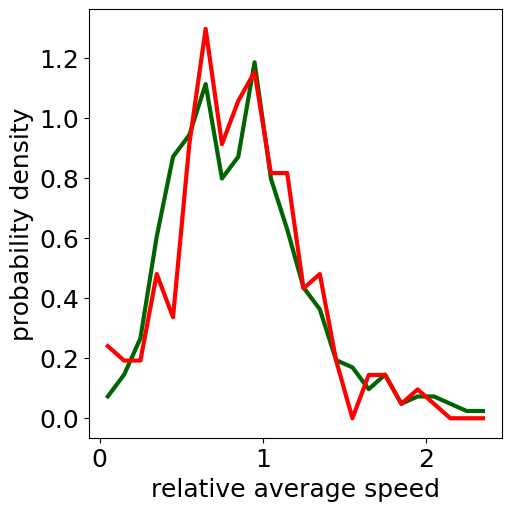

In [763]:
# pool 
fig,ax = plt.subplots(figsize=(5,5),layout="constrained")
control_dat = [get_avg_speed(z) for z in (dat22_control,dat33_control,dat40_control)]
tmz_dat = [get_avg_speed(z) for z in (dat22_500um,dat33_500um,dat40_500um)]
means = [np.nanmean(np.concatenate((x,y))) for x,y in zip(control_dat,tmz_dat) ]
 
control_dat = [x[x> 0]/y for x,y in zip(control_dat,means)]
tmz_dat = [x[x>0]/(1.5*y) for x,y in zip(tmz_dat,means)]

c,b =np.histogram(np.concatenate(control_dat),bins=np.arange(0,2.5,0.1),density=True,)
ax.plot((b[1:]+b[:-1])*0.5,c,c='darkgreen',lw=3)
c,b =np.histogram(np.concatenate(tmz_dat),bins=np.arange(0,2.5,0.1),density=True,)
ax.plot((b[1:]+b[:-1])*0.5,c,c='red',lw=3)

# ax.plot(b,c,c='red')

# ax.hist(np.concatenate(control_dat),color='darkgreen',density=True,alpha=0.8,bins=np.arange(0,2.5,0.1))
# ax.hist(np.concatenate(tmz_dat),color='red',density=True,alpha=0.8,bins=np.arange(0,2.5,0.1))



#ax.legend()
ax.set_xlabel('relative average speed')
ax.set_ylabel('probability density')
plt.savefig('/mnt/dioscuri-nas/Ilyas/distributions_avg_speed_cumulated_normed.svg')#,bbox_inches='tight')

# Displacement over time 

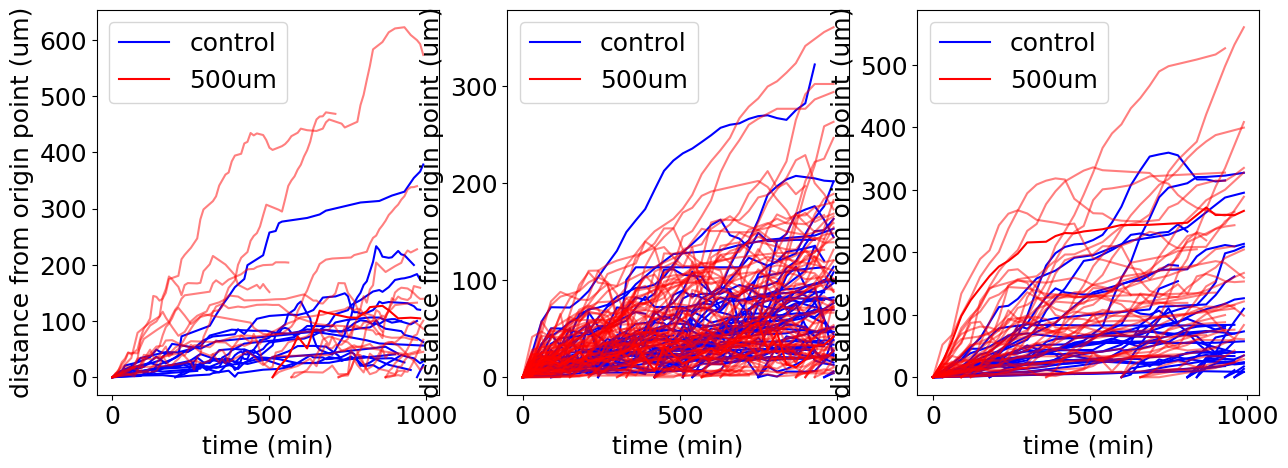

In [875]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        first = True
        for time,disp,speed in zip(dat[1],get_displacement(dat),get_speed(dat)):
            cnd = time < 1000
            if first: 
                ax[i].plot(time[cnd],disp[cnd],label=lab,color=color)
                first = False
            else:
                ax[i].plot(time[cnd],disp[cnd],color=color,alpha=0.5 if color == 'red' else 1.0)
    ax[i].set_xlabel('time (min)')
    ax[i].set_ylabel('distance from origin point (um)')
    ax[i].legend()
    

# Max displacement

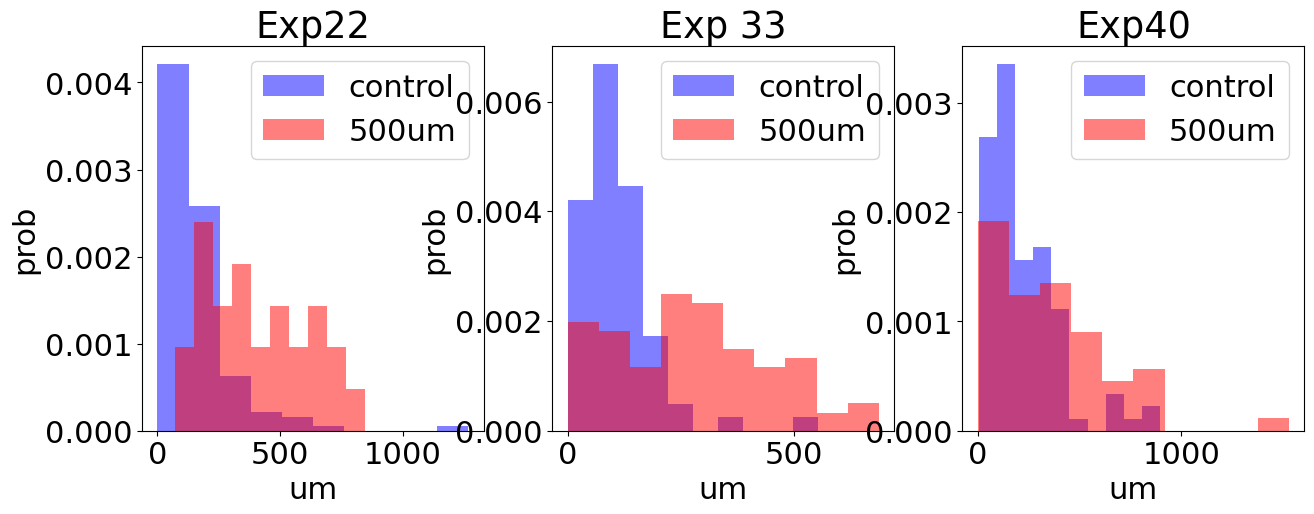

In [10]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        ax[i].hist(get_max_displacement(dat),color=color,label=lab,density=True,alpha=0.5)
    ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('um')
    ax[i].set_ylabel('prob')
    

# Distribution of instantaneous speed

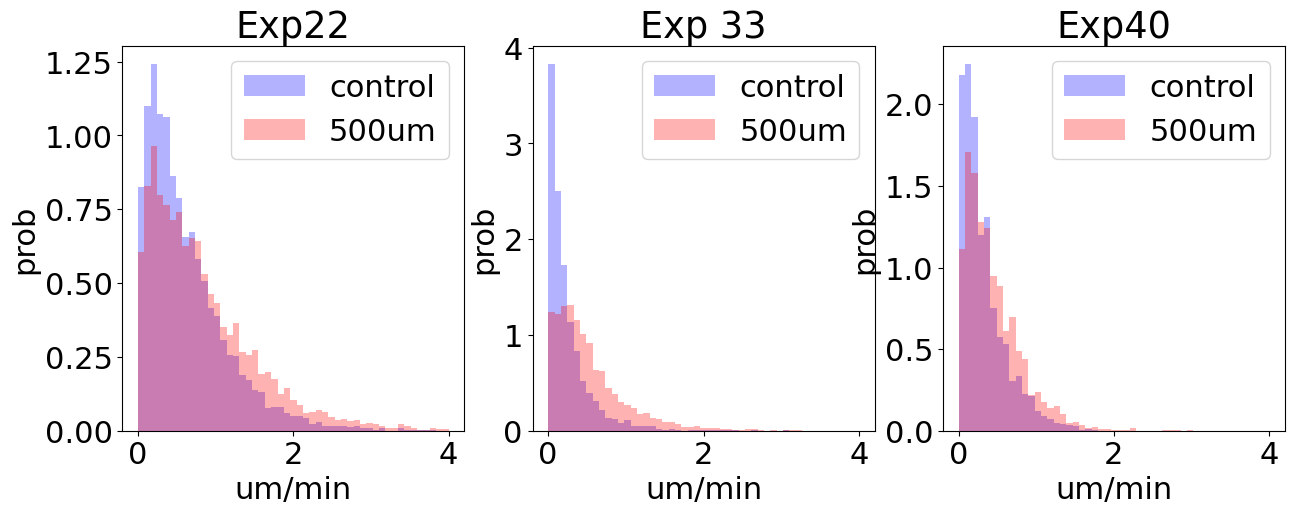

In [11]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        all_speeds = np.concatenate(get_speed(dat))
        ax[i].hist(all_speeds,color=color,bins=np.linspace(0,4,50),alpha=0.3,density=True,label=lab)
    ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('um/min')
    ax[i].set_ylabel('prob')

# Scatter plots

## Distance travelled vs speed

/tmp/ipykernel_860599/3774523252.py:20: RuntimeWarning: invalid value encountered in divide
  ax[i].scatter(av_speeds,max_distance/len_tracks,label=lab,color=color)


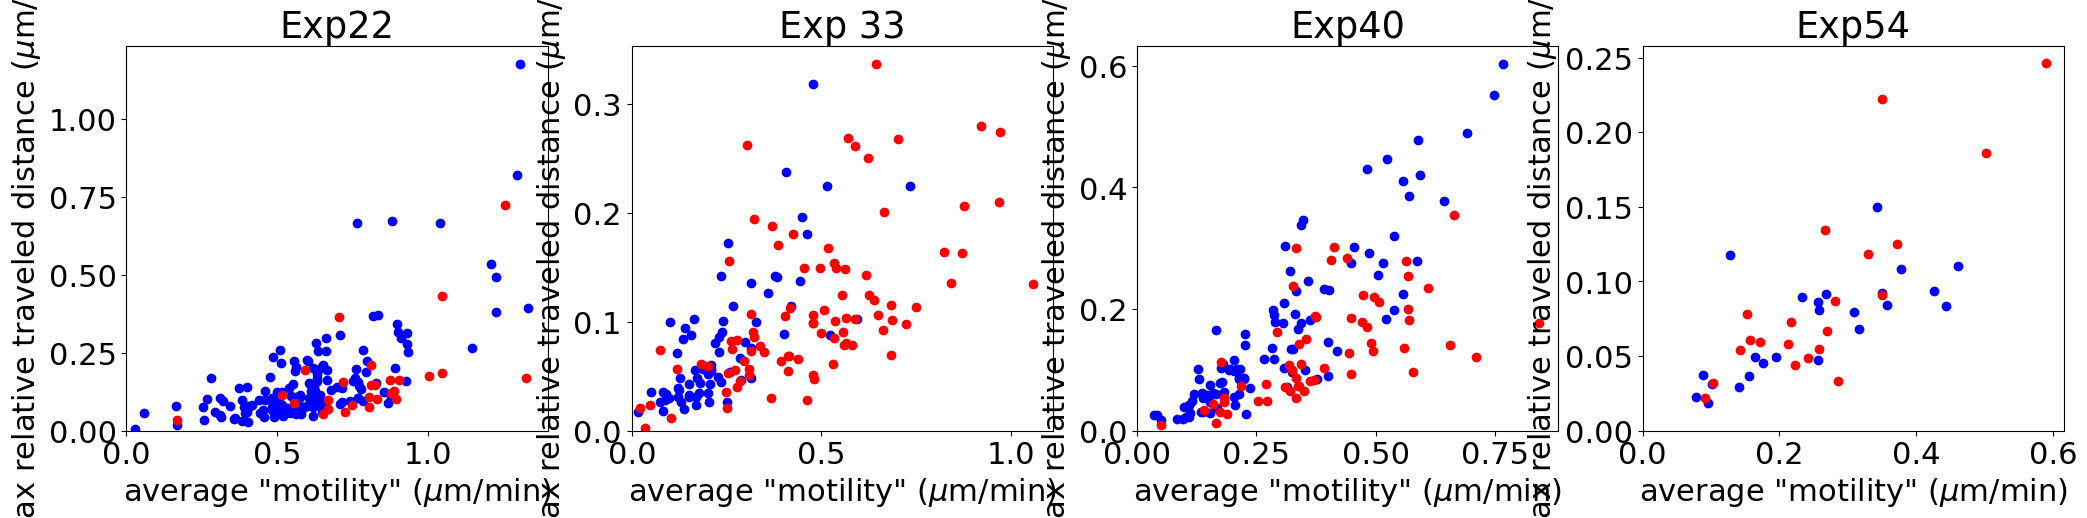

In [226]:
fig,ax = plt.subplots(1,4,figsize=(25,5))
from sklearn.linear_model import LinearRegression
for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control,dat54_control),  
                                                   (dat22_500um,dat33_500um,dat40_500um,dat54_500um),
                                                   ('Exp22','Exp 33','Exp40','Exp54'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        first = True
        alltimes = np.concatenate(dat[1])
        min_time,max_time = np.min(alltimes),np.max(alltimes)
        av_speeds,max_distance = get_avg_speed(dat),get_max_displacement(dat)
        assert len(av_speeds) == len(max_distance)
        times_tracks = dat[1]
        len_tracks = np.array([x[-1] - x[0] for x in times_tracks])
        if(np.any(len_tracks == 1)): print(exp_label,lab)
        #valid_tracks = np.array(get_valid_tracks(dat)) 
        #av_speeds = av_speeds[valid_tracks]
        #max_distance = max_distance[valid_tracks]
        #len_tracks = len_tracks[valid_tracks]
        ax[i].scatter(av_speeds,max_distance/len_tracks,label=lab,color=color)
        #LinearRegression
    ax[i].set_xlabel('average "motility" ($\mu$m/min)')
    ax[i].set_ylabel('max relative traveled distance ($\mu$m/min)')
    ax[i].set_title(exp_label)
    ax[i].set_xlim(0)
    ax[i].set_ylim(0)
    #ax[i].legend()

## Motility vs division time 

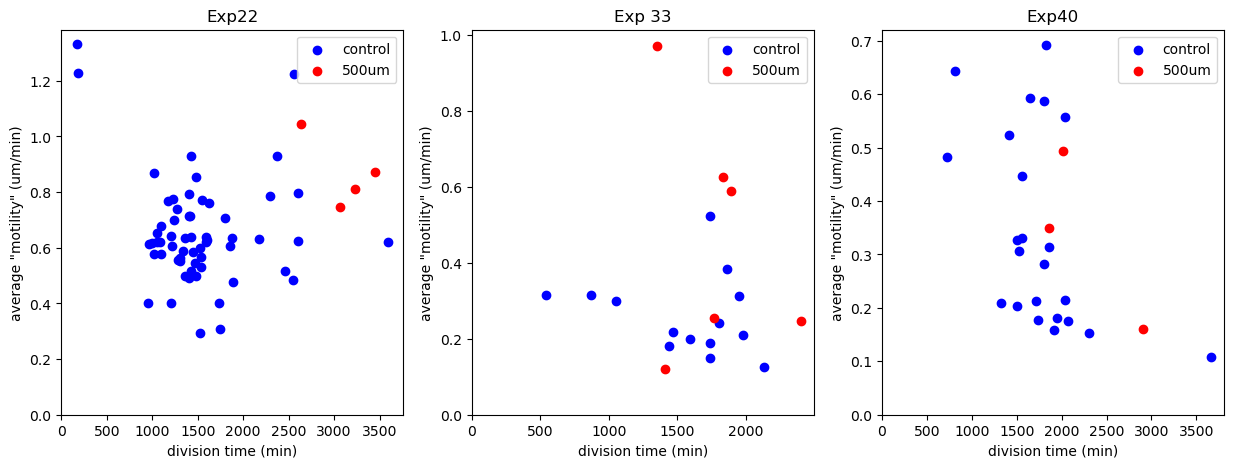

In [42]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        first = True
        alltimes = np.concatenate(dat[1])
        min_time,max_time = np.min(alltimes),np.max(alltimes)
        av_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
        assert len(av_speeds) == len(div_times)
        valid_tracks = np.array(get_valid_tracks(dat)) 
        av_speeds = np.array(av_speeds)[valid_tracks]
        div_times = div_times[valid_tracks]
        ax[i].scatter(div_times,av_speeds,label=lab,color=color)

    ax[i].set_xlabel('division time ({})'.format(time_unit))
    ax[i].set_ylabel('average "motility" (um/min)')
    ax[i].set_title(exp_label)
    ax[i].set_xlim(0)
    ax[i].set_ylim(0)
    ax[i].legend()

AssertionError: 

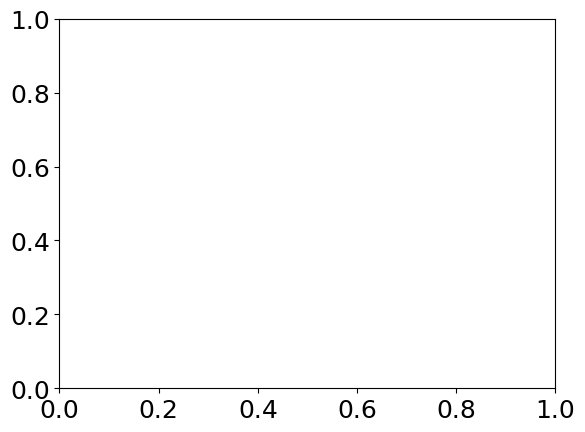

In [39]:
fig,ax = plt.subplots()#1,3,figsize=(15,5))
first = True
for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        alltimes = np.concatenate(dat[1])
        av_speeds,div_times = get_avg_speed(dat),get_div_times_lintree(dat)
        assert len(av_speeds) == len(div_times)
        valid_tracks = np.array(get_valid_tracks(dat)) 
        av_speeds = np.array(av_speeds)[valid_tracks]
        div_times = div_times[valid_tracks]
        if not first: lab=None 
        ax.scatter(div_times/60,av_speeds,label=lab,color=color)
    first = False
ax.set_xlabel('division time (hours)'.format(time_unit))
ax.set_ylabel('average speed ($\mu$m/min)')
ax.set_title('Experiments 22,33 and 40')
ax.set_xlim(0)
ax.set_ylim(0)
#ax.legend()

#plt.savefig('division_time_vs_motility.pdf',bbox_inches='tight')

## Fluo vs motility

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


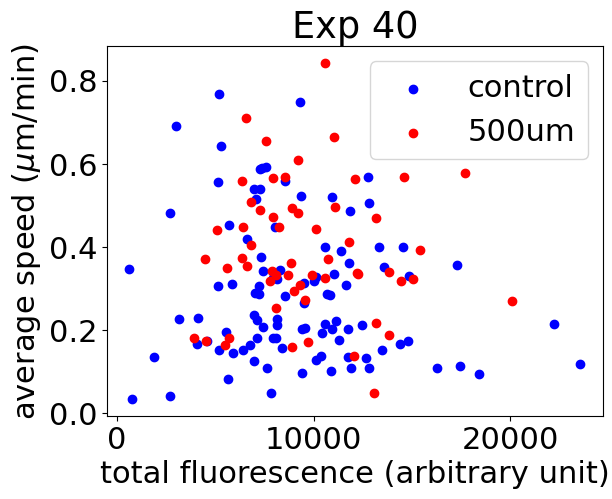

In [41]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = 'Exp 40'
dat = dat40_500um
lab = '500um'

for dat,xml,fluo,lab,color in zip((dat40_control,dat40_500um),
                             (tree40_control,tree40_500um),
                             (dat_fluo40_control,dat_fluo40_500um),
                             ('control','500um'),
                             ('blue','red') ):
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)    
    valid_tracks = get_valid_tracks(dat) 
    #avg_speeds = avg_speeds[valid_tracks]
    #div_times = div_times[valid_tracks]
    #avg_fluo = avg_fluo[valid_tracks]
    ax.scatter(avg_fluo,avg_speeds,label=lab,color=color)
    ax.set_xlabel('total fluorescence (arbitrary unit)')
    ax.set_ylabel('average speed ($\mu$m/min)')
    ax.set_title(exp_label)
ax.legend()
plt.savefig('avg_speed_vs_fluorescence_exp40.pdf',bbox_inches='tight')

## max/mean fluo vs lifespan/divtime or mean/max speed (8 plots in total)

In [37]:
dat54_500um_pool,fluos_500um_pool =  pool_dat([dat54_500um_high,dat54_500um_high_F5,dat54_500um_low,dat54_500um_low_F5],[dat_fluo54_500um_high,dat_fluo54_500um_high_F5,dat_fluo54_500um_low,dat_fluo54_500um_low_F5] )
dat54_control_pool,fluos_control_pool =  pool_dat([dat54_control_high,dat54_control_high_C5,dat54_control_low ],[dat_fluo54_control_high,dat_fluo54_control_high_C5,dat_fluo54_control_low] )


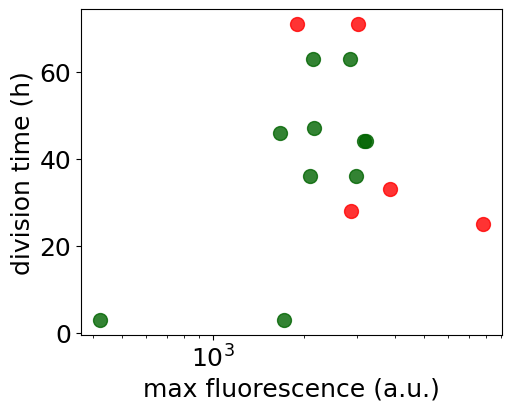

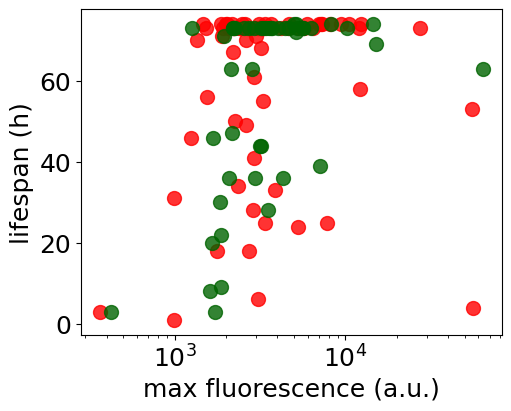

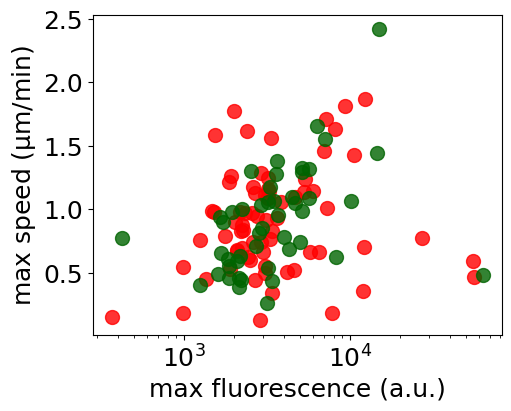

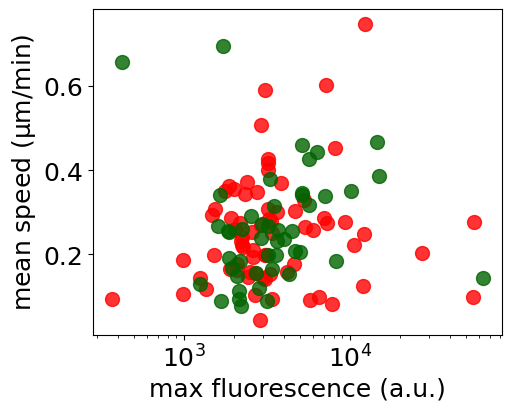

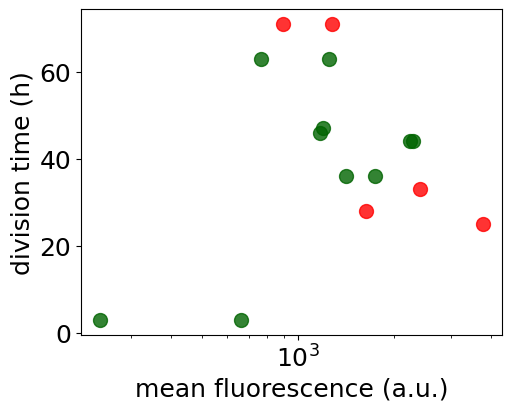

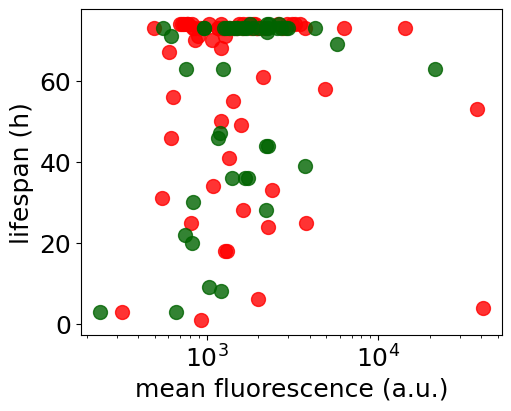

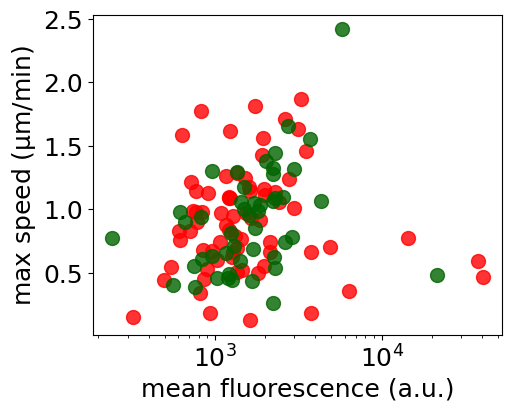

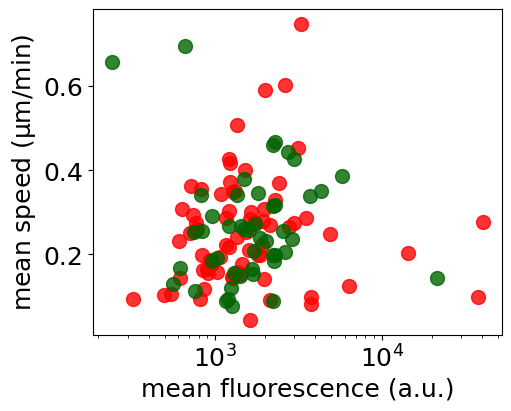

In [55]:
exp_label = None# 'Exp 54'


for xlab,xfn,xsname in (('max fluorescence (a.u.)',get_max_fluo_track,'max_fluo'),
                            ('mean fluorescence (a.u.)',get_avg_fluo_track,'mean_fluo')
                           ):
    for ylab,yfn,ysname in  (
                             ('division time (h)',get_div_times_lintree,'div_time'),
                             ('lifespan (h)',get_div_times_lintree,'lifespan'),
                             ('max speed ($\mathrm{\mu}$m/min)',get_max_speed,'max_speed'),
                             ('mean speed ($\mathrm{\mu}$m/min)',get_avg_speed,'mean_speed'),
                            ):
        fig,ax = plt.subplots(1,figsize=(5,4),layout='constrained')
        tosave = []
        for (dat,fluo,lab,color) in (
                                  [dat54_500um_pool,fluos_500um_pool,'500um (pooled F5+F6)','red'],
                                  [dat54_control_pool,fluos_control_pool,'control (pooled C5+C6)','darkgreen'],
                                    ):
            fluo_by_node = get_fluo_by_node(fluo)
            xdat = xfn(dat,fluo_by_node)
            ydat = yfn(dat)
            if ysname == 'div_time':
                ydat,ytype = ydat
                ydat = ydat[ytype == 1]
                xdat = xdat[ytype==1]
                ydat = ydat/60
            elif ysname == 'lifespan':
                ydat,ytype = ydat
                ydat = ydat/60
            #valid_tracks = [len(x) > 1 for x in dat[1] ]
            ax.scatter(xdat,ydat,label=lab,s=100,alpha=0.8,color=color)
            tosave.append(xdat)
            tosave.append(ydat)
            ax.set_xlabel(xlab)
            ax.set_ylabel(ylab)
            ax.set_xscale('log')
           #ax.set_title(exp_label)
        np.save(f'./output_data/scatter_{xsname}_vs_{ysname}.npy',tosave)
        plt.savefig(f'plots/scatter_{xsname}_vs_{ysname}.svg')
#ax.legend(fontsize='xx-small')
#plt.savefig('plots/avg_speed_vs_fluorescence_exp54_500um_2colors.pdf',bbox_inches='tight')

In [50]:
### Pearson statistics
from scipy.stats import pearsonr
from glob import glob
import ndtest 
for f in glob('./output_data/scatter*.npy'):
    x,y,x1,y1 = np.load(f,allow_pickle=True)
    P, D = ndtest.ks2d2s(x,y,x1,y1, extra=True)
    print(f)# {P=:.3g}, {D=:.3g}")
    print(f"2D pearson: {P=:.3g}, {D=:.3g}")
    print(f'pearson control {pearsonr(x,y)}')
    print(f'pearson treated {pearsonr(x1,y1)}')
    #, track_lens

./output_data/scatter_max_fluo_vs_div_time.npy
2D pearson: P=0.143, D=0.55
pearson control PearsonRResult(statistic=-0.6276711585835212, pvalue=0.25694591932226774)
pearson treated PearsonRResult(statistic=0.6143830325102022, pvalue=0.05877043715306811)
./output_data/scatter_max_fluo_vs_lifetime.npy
2D pearson: P=0.21, D=0.221
pearson control PearsonRResult(statistic=-0.15933123422163034, pvalue=0.18443756187747676)
pearson treated PearsonRResult(statistic=0.1616197842334922, pvalue=0.2777763984764937)
./output_data/scatter_max_fluo_vs_max_speed.npy
2D pearson: P=0.493, D=0.174
pearson control PearsonRResult(statistic=-0.08527008529304954, pvalue=0.47954507419466325)
pearson treated PearsonRResult(statistic=0.0652600947163141, pvalue=0.66296853779234)
./output_data/scatter_max_fluo_vs_mean_speed.npy
2D pearson: P=0.425, D=0.183
pearson control PearsonRResult(statistic=-0.027778894980691925, pvalue=0.8181238202117832)
pearson treated PearsonRResult(statistic=-0.03080742751998143, pvalue

In [43]:
dat33_control,tree33_control = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/01_Control-1_23054.xml',remove_spurious=True)

01_Control-1_23054.xml
time step: 1799.967041015625 sec pixel size: [0.66917518 0.66917518] um
removed 1 spurious tracks
#tracks: 164, ( 3 <  5 timepoints)


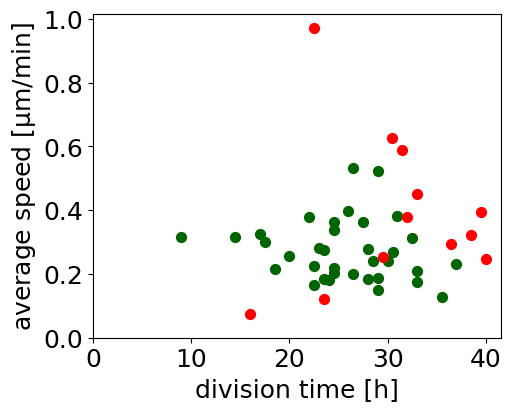

In [45]:

first = True
for i,(control,treated,exp_label) in enumerate(zip( (dat33_control,),  (dat33_500um,),('Exp 33',))):
    fig,ax = plt.subplots(figsize=(5,4),layout='constrained')
    for dat,lab,color in zip((control,treated),('control','500um'),('darkgreen','red') ):
        alltimes = np.concatenate(dat[1])
        av_speeds,(div_times,div_type) = get_avg_speed(dat),get_div_times_lintree(dat)
        assert len(av_speeds) == len(div_times)
        valid_tracks = np.array(get_valid_tracks(dat)) 
        av_speeds = np.array(av_speeds)[valid_tracks]
        div_times = div_times[valid_tracks]
        if not first: lab=None 
        ax.scatter(div_times/60,av_speeds,s=50,label=lab,color=color)
    first = False
    ax.set_xlabel('division time [h]')
    ax.set_ylabel('average speed [$\mathrm{\mu}$m/min]')
    ax.set_xlim(0)
    ax.set_ylim(0)

    plt.savefig('division_time_vs_motility_{}.svg'.format(exp_label))

## E54

### Pool by well

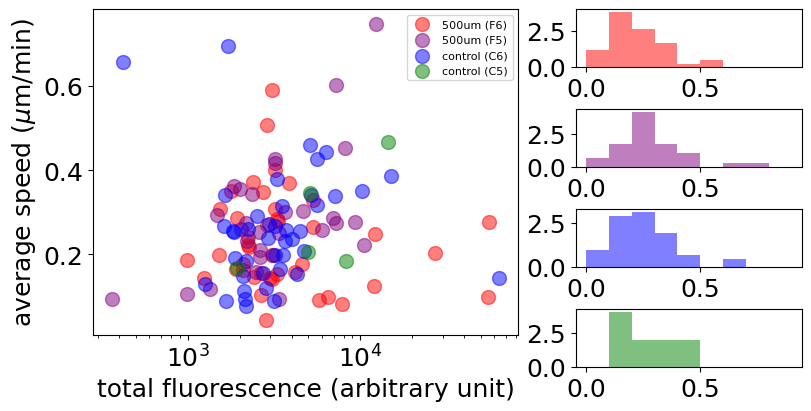

In [20]:
dat54_F6,fluos_F6 =  pool_dat([dat54_500um_high,dat54_500um_low],[dat_fluo54_500um_high,dat_fluo54_500um_low] )
dat54_C6,fluos_C6 =  pool_dat([dat54_control_high,dat54_control_low],[dat_fluo54_control_high,dat_fluo54_control_low] )
dat54_F5,fluos_F5 =  pool_dat([dat54_500um_high_F5,dat54_500um_low_F5],[dat_fluo54_500um_high_F5,dat_fluo54_500um_low_F5] )
dat54_C5,fluos_C5 =  pool_dat([dat54_control_high_C5,],[dat_fluo54_control_high_C5,] )

fig = plt.figure(layout="constrained",figsize=(8,4))
gs0 = fig.add_gridspec(2, 5)
ax1 = fig.add_subplot(gs0[:,:3])
gs2 = gs0[:,3:].subgridspec(4, 1)
ax = [fig.add_subplot(ss) for ss in gs2]
exp_label = None# 'Exp 54'
for i,(dat,fluo,lab,color) in enumerate( (
                             [dat54_F6,fluos_F6,'500um (F6)','red'],
                          [dat54_F5,fluos_F5,'500um (F5)','purple'],
                          [dat54_C6,fluos_C6,'control (C6)','blue'],
                         [dat54_C5,fluos_C5,'control (C5)','green'],
                                         )
                          ):
    # if 'control' in lab:
    #     continue 
    #color = 'red'
    avg_speeds = get_avg_speed(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    max_fluo = get_max_fluo_track(dat,fluo_by_node)
    #avg_fluo = get_avg_fluo_track(dat,fluo_by_node)

    #valid_tracks = get_valid_tracks(dat) 
    valid_tracks = [len(x) > 1 for x in dat[1] ]
    #ax.scatter(max_fluo/avg_fluo,label=lab,s=100,alpha=0.5,color=color)
    ax1.scatter(max_fluo,avg_speeds,label=lab,s=100,alpha=0.5,color=color)
    #ax.plot([0,10.],[0,10])
    ax1.set_xlabel('total fluorescence (a.u.)')
    ax1.set_ylabel('average speed ($\mu$m/min)')
    ax1.set_title(exp_label)
    #ax = fig.add_subplot(gs2[i])
    #ax[i].hist(avg_speeds,color=color,label=lab,density=True,alpha=0.5,bins=np.arange(0,0.8,0.05))
    ax[i].hist(avg_speeds,color=color,label=lab,density=True,alpha=0.5,bins=np.arange(0,1.0,0.1))


ax1.legend(fontsize=8)
ax1.set_xscale('log')
#plt.savefig('plots/avg_speed_vs_fluorescence_exp54_500um_2colors.pdf',bbox_inches='tight')

### Pool by type

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


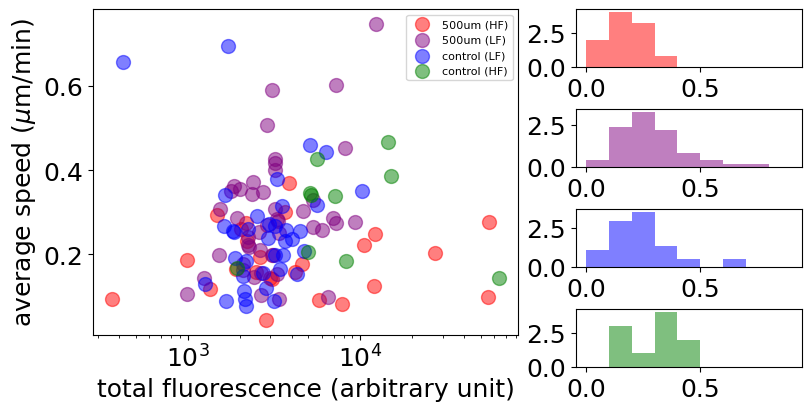

In [6]:
dat54_500um_hf,fluos_500um_hf =  pool_dat([dat54_500um_high,dat54_500um_high_F5],[dat_fluo54_500um_high,dat_fluo54_500um_high_F5] )
dat54_500um_lf,fluos_500um_lf =  pool_dat([dat54_500um_low,dat54_500um_low_F5],[dat_fluo54_500um_low,dat_fluo54_500um_low_F5] )
dat54_control_hf,fluos_control_hf =  pool_dat([dat54_control_high,dat54_control_high_C5],[dat_fluo54_control_high,dat_fluo54_control_high_C5] )
dat54_control_lf,fluos_control_lf =  pool_dat([dat54_control_low ,],[dat_fluo54_control_low,] )

fig = plt.figure(layout="constrained",figsize=(8,4))
gs0 = fig.add_gridspec(2, 5)
ax1 = fig.add_subplot(gs0[:,:3])
gs2 = gs0[:,3:].subgridspec(4, 1)
ax = [fig.add_subplot(ss) for ss in gs2]
exp_label = None# 'Exp 54'
for i,(dat,fluo,lab,color) in enumerate( (
                          [dat54_500um_hf,fluos_500um_hf,'500um (HF)','red'],
                          [dat54_500um_lf,fluos_500um_lf,'500um (LF)','purple'],
                          [dat54_control_lf,fluos_control_lf,'control (LF)','blue'],
                          [dat54_control_hf,fluos_control_hf,'control (HF)','green'],
                         #[dat54_C5,fluos_C5,'control (C5)','green'],
                                         )
                          ):
    # if 'control' in lab:
    #     continue 
    #color = 'red'
    
    avg_speeds = get_avg_speed(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    max_fluo = get_max_fluo_track(dat,fluo_by_node)
    #avg_fluo = get_avg_fluo_track(dat,fluo_by_node)

    valid_tracks = [len(x) > 1 for x in dat[1] ]
    ax1.scatter(max_fluo,avg_speeds,label=lab,s=100,alpha=0.5,color=color)
    ax1.set_xlabel('total fluorescence (a.u.)')
    ax1.set_ylabel('average speed ($\mu$m/min)')
    ax1.set_title(exp_label)
    #ax = fig.add_subplot(gs2[i])
    ax[i].hist(avg_speeds,color=color,label=lab,density=True,alpha=0.5,bins=np.arange(0,1.0,0.1))

ax1.legend(fontsize=8)
ax1.set_xscale('log')
#plt.savefig('plots/avg_speed_vs_fluorescence_exp54_500um_2colors.pdf',bbox_inches='tight')

### Pool by treatment

In [ ]:
dat54_500um_pool,fluos_500um_pool =  pool_dat([dat54_500um_high,dat54_500um_high_F5,dat54_500um_low,dat54_500um_low_F5],[dat_fluo54_500um_high,dat_fluo54_500um_high_F5,dat_fluo54_500um_low,dat_fluo54_500um_low_F5] )
dat54_control_pool,fluos_control_pool =  pool_dat([dat54_control_high,dat54_control_high_C5,dat54_control_low ],[dat_fluo54_control_high,dat_fluo54_control_high_C5,dat_fluo54_control_low] )


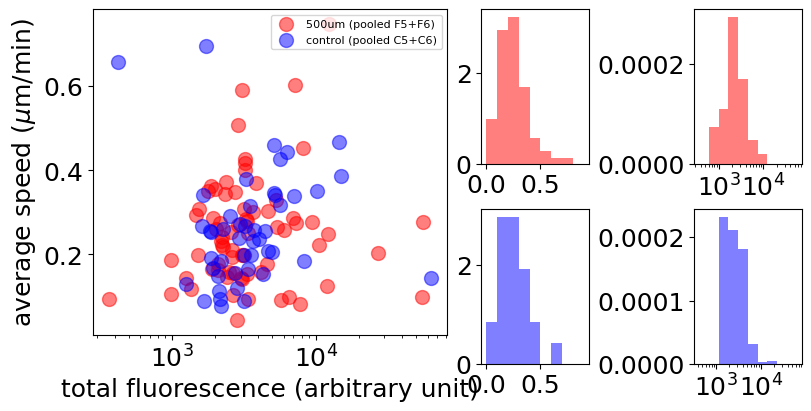

In [200]:
fig = plt.figure(layout="constrained",figsize=(8,4))
gs0 = fig.add_gridspec(2, 6)
ax1 = fig.add_subplot(gs0[:,:3])
gs2 = gs0[:,3:].subgridspec(2, 2)
ax = [fig.add_subplot(ss) for ss in gs2]
exp_label = None# 'Exp 54'
# for i,(dat,fluo,lab,color) in enumerate( (
#                           [dat54_500um_pool,fluos_500um_pool,'500um (pooled F5+F6)','red'],
#                           [dat54_control_pool,fluos_control_pool,'control (pooled C5+C6)','blue'],
#                          #[dat54_C5,fluos_C5,'control (C5)','green'],
#                                          )
#                           ):
    # if 'control' in lab:
    #     continue 
    #color = 'red'
    
    avg_speeds = get_avg_speed(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    max_fluo = get_max_fluo_track(dat,fluo_by_node)

    ax1.scatter(max_fluo,avg_speeds,label=lab,s=100,alpha=0.5,color=color)
    ax1.set_xlabel('total fluorescence (a.u.)')
    ax1.set_ylabel('average speed ($\mu$m/min)')
    ax1.set_title(exp_label)
    #ax = fig.add_subplot(gs2[i])
    ax[2*i].hist(avg_speeds,color=color,label=lab,density=True,alpha=0.5,bins=np.arange(0,1.0,0.1))
    hist, bins = np.histogram(max_fluo)#, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.xscale('log')
    ax[2*i+1].hist(max_fluo,bins=logbins,color=color,label=lab,density=True,alpha=0.5)#,bins=np.arange(0,1.0,0.1))
    ax[2*i+1].set_xscale('log')

ax1.legend(fontsize=8)
ax1.set_xscale('log')
#plt.savefig('plots/avg_speed_vs_fluorescence_exp54_500um_2colors.pdf',bbox_inches='tight')

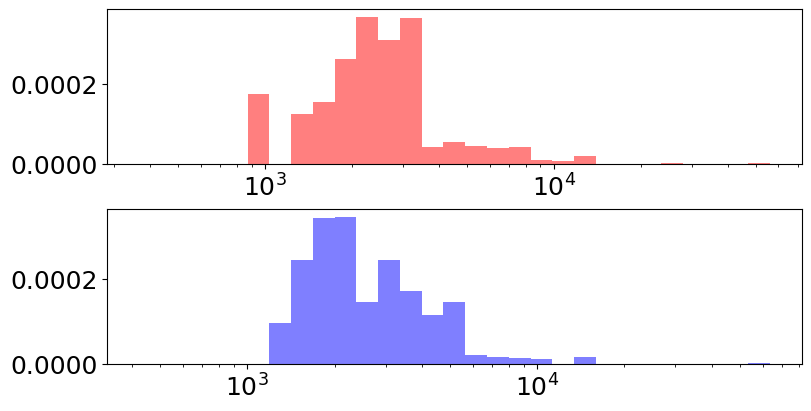

In [199]:
fig = plt.figure(layout="constrained",figsize=(8,4))
gs0 = fig.add_gridspec(2, 1)
#ax1 = fig.add_subplot(gs0[:,:3])

ax = [fig.add_subplot(ss) for ss in gs0]
exp_label = None# 'Exp 54'
for i,(dat,fluo,lab,color) in enumerate( (
                          [dat54_500um_pool,fluos_500um_pool,'500um (pooled F5+F6)','red'],
                          [dat54_control_pool,fluos_control_pool,'control (pooled C5+C6)','blue'],
                         #[dat54_C5,fluos_C5,'control (C5)','green'],
                                         )
                          ):
    # if 'control' in lab:
    #     continue 
    #color = 'red'
    
    avg_speeds = get_avg_speed(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    max_fluo = get_max_fluo_track(dat,fluo_by_node)

    # ax1.scatter(max_fluo,avg_speeds,label=lab,s=100,alpha=0.5,color=color)
    # ax1.set_xlabel('total fluorescence (arbitrary unit)')
    # ax1.set_ylabel('average speed ($\mu$m/min)')
    # ax1.set_title(exp_label)
    #ax = fig.add_subplot(gs2[i])
    bins = [min(max_fluo),max(max_fluo)]
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),30)
    #plt.xscale('log')
    ax[i].hist(max_fluo,bins=logbins,color=color,label=lab,density=True,alpha=0.5)#,bins=np.arange(0,1.0,0.1))
    ax[i].set_xscale('log')



/tmp/ipykernel_295889/999433514.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(dat[0]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


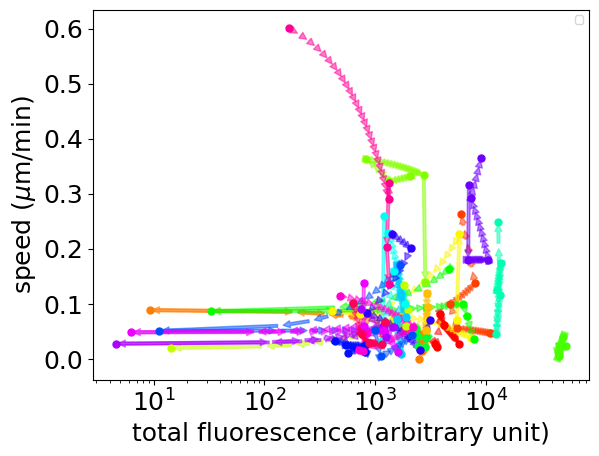

In [183]:
dat54_500um_hf,fluos_500um_hf =  pool_dat([dat54_500um_high,dat54_500um_high_F5],[dat_fluo54_500um_high,dat_fluo54_500um_high_F5] )
dat54_500um_lf,fluos_500um_lf =  pool_dat([dat54_500um_low,dat54_500um_low_F5],[dat_fluo54_500um_low,dat_fluo54_500um_low_F5] )
dat54_control_hf,fluos_control_hf =  pool_dat([dat54_control_high,dat54_control_high_C5],[dat_fluo54_control_high,dat_fluo54_control_high_C5] )
dat54_control_lf,fluos_control_lf =  pool_dat([dat54_control_low ,],[dat_fluo54_control_low,] )

# fig = plt.figure(layout="constrained",figsize=(8,4))
# gs0 = fig.add_gridspec(2, 5)
# ax1 = fig.add_subplot(gs0[:,:3])
# gs2 = gs0[:,3:].subgridspec(4, 1)
# ax = [fig.add_subplot(ss) for ss in gs2]
exp_label = None# 'Exp 54'
fig,ax1 = plt.subplots()
npts = 5

for i,(dat,fluo,lab,color) in enumerate( (
                          [dat54_500um_hf,fluos_500um_hf,'500um (HF)','red'],
                          #[dat54_500um_lf,fluos_500um_lf,'500um (LF)','purple'],
                          #[dat54_control_lf,fluos_control_lf,'control (LF)','blue'],
                          #[dat54_control_hf,fluos_control_hf,'control (HF)','green'],
                         #[dat54_C5,fluos_C5,'control (C5)','green'],
                                         )
                          ):
    cmap = plt.cm.get_cmap('hsv', len(dat[0]))
    speeds = get_speed(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    fluo_tracks = get_fluo_track(dat,fluo_by_node)

    for j,(speed,fluo_track) in enumerate(zip(speeds,fluo_tracks)):
        #ax1.scatter(fluo_track[1:],speed,color=color)
        if len(speed) < npts:
            #ax1.plot(fluo_track[1:],speed)#,color=color)
            dat = np.array([fluo_track[1:],speed])
        else:
            #ax1.plot(fluo_track[-npts:],speed[-npts:])
            #dat = np.array([fluo_track[-npts:],speed[-npts:]])
            arrowplot(ax1,fluo_track[-npts:],speed[-npts:],color=cmap(j))
    #fluo_by_node = get_fluo_by_node(fluo)
    #max_fluo = get_max_fluo_track(dat,fluo_by_node)
    #avg_fluo = get_avg_fluo_track(dat,fluo_by_node)

    #valid_tracks = [len(x) > 1 for x in dat[1] ]
    #ax1.scatter(max_fluo,avg_speeds,label=lab,s=100,alpha=0.5,color=color)
    ax1.set_xlabel('total fluorescence (a.u.)')
    ax1.set_ylabel('speed ($\mu$m/min)')
    ax1.set_title(exp_label)
    #ax = fig.add_subplot(gs2[i])
#    ax[i].hist(avg_speeds,color=color,label=lab,density=True,alpha=0.5,bins=np.arange(0,1.0,0.1))

ax1.legend(fontsize=8)
ax1.set_xscale('log')
#plt.savefig('plots/avg_speed_vs_fluorescence_exp54_500um_2colors.pdf',bbox_inches='tight')

## Fluo vs life time

### Exp40

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


control PearsonRResult(statistic=0.19587579898826848, pvalue=0.050808309977536846)
500um PearsonRResult(statistic=0.44157618181880565, pvalue=0.0005205989601329517)


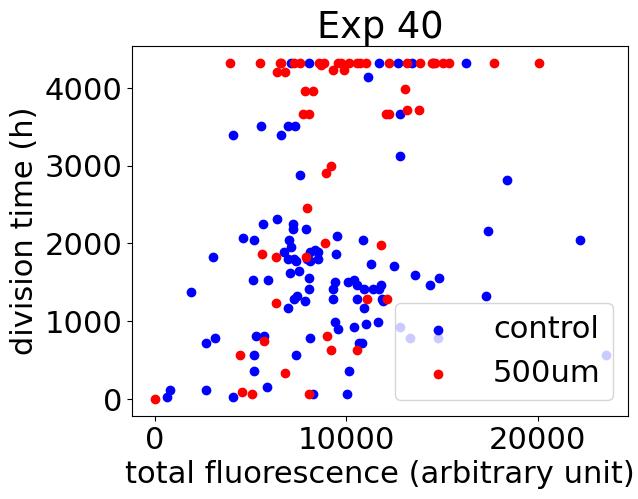

In [42]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = 'Exp 40'
dat = dat40_500um
lab = '500um'
from scipy.stats import pearsonr
for dat,xml,fluo,lab,color in zip((dat40_control,dat40_500um),
                             (tree40_control,tree40_500um),
                             (dat_fluo40_control,dat_fluo40_500um),
                             ('control','500um'),
                             ('blue','red') ):
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)   
    #valid_tracks = get_valid_tracks(dat)
    #div_times = div_times[valid_tracks]
    #avg_fluo = avg_fluo[valid_tracks]
    track_lens = [t[-1] - t[0] for t in dat[1]]
    print(lab,pearsonr(avg_fluo, track_lens))

    ax.scatter(avg_fluo,track_lens,label=lab,color=color)
    ax.set_xlabel('total fluorescence (a.u.)')
    ax.set_ylabel('track lifespan (h)')
    ax.set_title(exp_label)
ax.legend()
plt.savefig('fluo_vs_lifespan_exp40.pdf',bbox_inches='tight')

### Exp 54

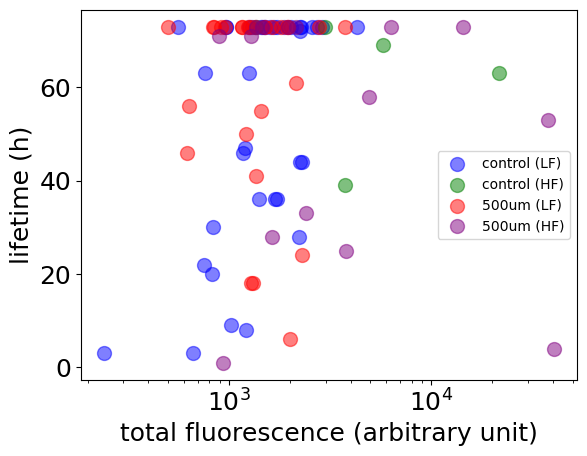

In [60]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = None# 'Exp 54'
ax.set_title(exp_label)
#dat = dat40_500um
#lab = '500um'
from scipy.stats import pearsonr
for dat,xml,fluo,lab,color in zip((dat54_control_low,dat54_control_high,dat54_500um_low,dat54_500um_high),
                             (tree54_control_low,tree54_control_high,tree54_500um_low,tree54_500um_high),
                             (dat_fluo54_control_low,dat_fluo54_control_high,dat_fluo54_500um_low,dat_fluo54_500um_high),
                             ('control (LF)','control (HF)','500um (LF)','500um (HF)'),
                             ('blue','green','red','purple')):
    # if '500um' in lab:
    #     continue
    # color = 'blue'
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)   
    #valid_tracks = get_valid_tracks(dat)
    #div_times = div_times[valid_tracks]
    #avg_fluo = avg_fluo[valid_tracks]
    track_lens = np.array([t[-1] - t[0] for t in dat[1]])/60
    # marker = MarkerStyle(markerfacecolor=None,
    #               markeredgecolor=color,)
    ax.scatter(avg_fluo,track_lens,label=lab,s=100,alpha=0.5,color=color,
              #facecolors='none',
              )
    ax.set_xlabel('total fluorescence (a.u.)')
    ax.set_ylabel('lifespan (h)')

ax.legend(prop= {'size'   : 10})
ax.set_xscale('log')

#plt.savefig('./plots/fluo_vs_lifespan_exp54_control_1color.pdf',bbox_inches='tight')

# Lineage trees

## average speed tree

In [195]:
for i,(control,treated,tree_control,tree_treated,exp_label) in enumerate(
    zip((dat22_control,dat33_control,dat40_control),
        (dat22_500um,dat33_500um,dat40_500um),
        (tree22_control,tree33_control,tree40_control),  
        (tree22_500um,tree33_500um,tree40_500um),
        ('Exp22','Exp 33','Exp40'))):
    for dat,tree,lab in zip((control,treated),(tree_control,tree_treated),('control','500um')):
        ts = TreeStyle()
        ts.scale =  3
        ete_tree = create_tree_ete3(tree,None,None)
        speeds_id = get_speed(dat,by_id=True)
        avg_speed = get_avg_speed(dat)
        node_track = node_to_tracks(tree)
        maxspeed = max(avg_speed) # np.array(list(speeds_id.values())).max()
        
        for n in ete_tree.traverse('postorder'):
            n.img_style["size"] = 0 #this is required to ensure properly sized branches
            n.img_style["hz_line_width"] = 10
            #c=pow(node_to_vel[node.name]/max_vel,0.7)
            node_id = n.name
            if node_id == 'root': continue
            speed = avg_speed[node_track[node_id]]
            #if node_id in speeds_id:
            #    t = tree.time[node_id]
            # normalise speed 
            c = pow(speed/maxspeed,0.7)
            if np.isnan(c): 
                n.img_style['hz_line_color'] = '#%02x%02x%02x' % (0, 0,0 )
            else:
                n.img_style['hz_line_color'] = '#%02x%02x%02x' % (int(255*c), 0, int(255*(1-c)))
        ete_tree.render(f'./plots/tree_speed_{exp_label}_{lab}.pdf',tree_style=ts,h=1000)        

In [205]:
# Plot everyone at once 
# from glob import glob
# plt.figure(figsize=(20,10))
# columns = 2
# images = glob('./plots/tree_speed_*pdf')
# for i, image in enumerate(images):
#     image = render_pdf_notebook(image)
#     plt.subplot(len(images) // columns + 1, columns, i + 1)
#     ax = plt.gca()
#     ax.axis('off')
#     plt.imshow(image)
#     #render_pdf_notebook('/tmp/exp_Exp 33_control.pdf')

## fluorescence

### Experiment 40

In [14]:
exp_label = 'Exp40'
for dat,tree,fluo,lab,color in zip((dat40_control,dat40_500um),
                             (tree40_control,tree40_500um),
                             (dat_fluo40_control,dat_fluo40_500um),
                             ('control','500um'),
                             ('blue','red') ):
    fluo_by_node = get_fluo_by_node(fluo)
    #valid_tracks = get_valid_tracks(dat)
    avg_fluo_track = get_avg_fluo_track(dat,fluo_by_node)    
    max_fluo_track = max(avg_fluo_track)
    ete_tree = create_tree_ete3(tree,None,None)
    node_track = node_to_tracks(tree)
    ts = TreeStyle()
    ts.scale =  3
    for n in ete_tree.traverse('postorder'):
        n.img_style["size"] = 0 #this is required to ensure properly sized branches
        n.img_style["hz_line_width"] = 10
        #c=pow(node_to_vel[node.name]/max_vel,0.7)
        node_id = n.name
        if node_id == 'root': 
            continue
        #if node_id in fluo_by_node:
        track_id = node_track[node_id]
        avg_fluo = avg_fluo_track[track_id]
        t = tree.time[node_id]
        # normalise fluorescence 
        c = avg_fluo/max_fluo_track # (fluorescence_by_node[node_id]-min_fluo[t])/delta_fluo[t]
        n.img_style['hz_line_color'] = '#%02x%02x%02x' % (int(255*c), 0, int(255*(1-c)))
        
    ete_tree.render(f'./plots/tree_fluo_{exp_label}_{lab}.pdf',tree_style=ts,h=1000)   
    

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


### Plot trajectories in fluo-speed phase space

# Timeseries

## average speed timeseries 

/home/idjafc/Notebooks/Cells/Tracking/../utils/track_fns.py:167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(speeds)


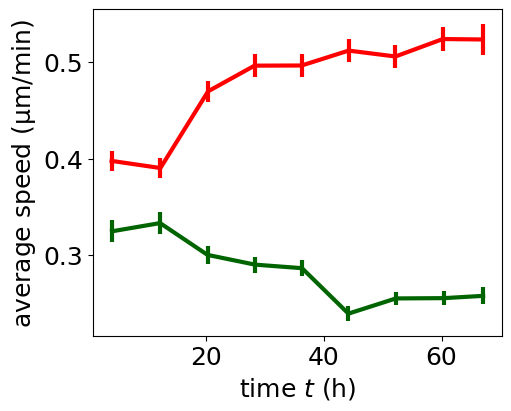

In [68]:

def plot_av(ax,data,qx=0.33): # data in the form of a list of pairs of lists [x] and [y] of coordinates
    #xx,yy,nn=np.full((10),0),np.full((10),0),np.full((10),0)
    ##xx,yy=[[] for i in range(0,9)],[[] for i in range(0,9)]
    xx,yy=[[]],[[]]
    for d in data:
        x,y=d
        #inds=np.array(x/qx,dtype=int)
        #xx
        for i in range(0,len(x)):
            #print(x[i]," ",y[i])
            j=int(x[i]/qx)
            if (j<len(xx)):
                yy[j].append(y[i])
                xx[j].append(x[i])
            else:
                yy.append([])
                xx.append([])
        #print(inds)
        #xx
    #print([np.mean(y) for y in yy])
    return [np.mean(x) for x in xx],[np.mean(y) for y in yy],[np.std(y)/np.sqrt(len(y)) for y in yy]
    
fig, ax = plt.subplots(1,1,figsize=(5,4),layout='constrained',sharey=True)
for i,(dat,lab) in enumerate( (                
                (dat33_500um, 'e33500um'), (dat33_control, 'e33econtrol'),)):
    times = dat[1]
    vels = get_speed(dat)
    tracks_pos = [ [t[:-1]/60,v] for t,v in zip(times,vels)]
    x,y,e = plot_av(ax,tracks_pos,qx=8)
    #e/=y[0]
    #y/=y[0]
    ax.errorbar(x,y,e,lw=3,label=lab,color='red' if '500um' in lab else 'darkgreen')
    
#plt.legend(fontsize=10)
    ax.set_xlabel('time $t$ (h)')
    ax.set_ylabel('average speed ($\mathrm{\mu}$m/min)')

plt.savefig('plots/avg_speed_vs_time.svg')

## fluorescence timeseries

In [5]:
dat54_500um_hf,fluos_500um_hf =  pool_dat([dat54_500um_high,dat54_500um_high_F5],[dat_fluo54_500um_high,dat_fluo54_500um_high_F5] )
dat54_500um_lf,fluos_500um_lf =  pool_dat([dat54_500um_low,dat54_500um_low_F5],[dat_fluo54_500um_low,dat_fluo54_500um_low_F5] )
dat54_control_hf,fluos_control_hf =  pool_dat([dat54_control_high,dat54_control_high_C5],[dat_fluo54_control_high,dat_fluo54_control_high_C5] )
dat54_control_lf,fluos_control_lf =  pool_dat([dat54_control_low ,],[dat_fluo54_control_low,] )


In [6]:
dat54_hf,fluos54_hf =  pool_dat([dat54_500um_hf,dat54_control_hf],[fluos_500um_hf,fluos_control_hf] )
dat54_lf,fluos54_lf =  pool_dat([dat54_500um_lf,dat54_control_lf],[fluos_500um_lf,fluos_control_lf] )

In [8]:
dat54_allcontrols,dat_fluo54_allcontrols =  pool_dat([dat54_control_high,dat54_control_low,dat54_control_high_C5,dat54_control_low],
                                                     [dat_fluo54_control_high,dat_fluo54_control_low,dat_fluo54_control_high_C5,dat_fluo54_control_low],
                                                    )


dat54_alltreated,dat_fluo54_alltreated =  pool_dat([dat54_500um_high,dat54_500um_low,dat54_500um_high_F5,dat54_500um_low],
                                                     [dat_fluo54_500um_high,dat_fluo54_500um_low,dat_fluo54_500um_high_F5,dat_fluo54_500um_low],
                                                    )


## fluorescence timeseries comparison 

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


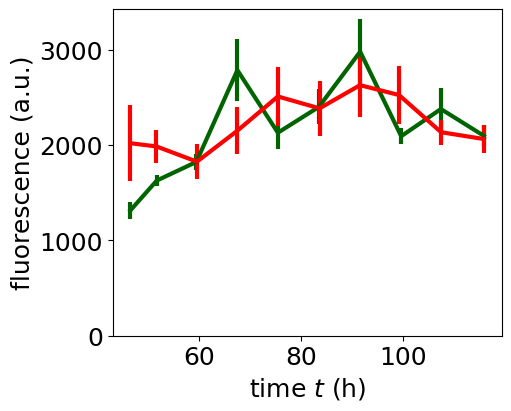

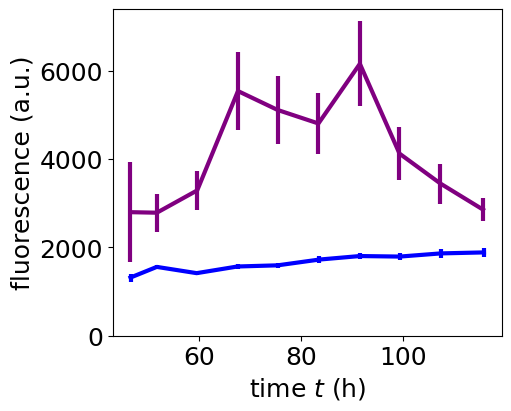

In [69]:

exp_label = None# 'Exp 54'
dat_to_compare = {'fluo_timeseries_control_vs_treated':(
                          [dat54_allcontrols,dat_fluo54_allcontrols,'controls','darkgreen'],
                           [dat54_alltreated,dat_fluo54_alltreated,'treated','red']),
                  'fluo_timeseries_high_vs_low':(                         
                          [dat54_hf,fluos54_hf,'HF','purple'],
                          [dat54_lf,fluos54_lf,'LF','blue'])
                     }
for figname,dats in dat_to_compare.items():
    fig,ax = plt.subplots(1,figsize=(5,4),layout='constrained')
    for i,(dat,fluo,lab,color) in enumerate(dats):
        #dat = dat54_500um_high
        #fluo = dat_fluo54_500um_high
        fluo_by_node = get_fluo_by_node(fluo)
        fluo_tracks = get_fluo_track(dat,fluo_by_node)
        # max_fluo = get_max_fluo_track(dat,fluo_by_node)
        # avg_fluo = get_avg_fluo_track(dat,fluo_by_node)
        times = dat[1]
        times_new = [ np.minimum(e,24*60*5 - 60) for e in times]
        times_bin,fluo_bin,fluo_stderr = bin_xy_data(list(zip(times_new,fluo_tracks)),qx=8*60,dropnan=True)
        #valid_tracks = get_valid_tracks(dat) 
        #valid_tracks = [len(x) > 1 for x in dat[1] ]
        #ax.scatter(max_fluo/avg_fluo,label=lab,s=100,alpha=0.5,color=color)
        to_shift = times_bin == 5 
        ax.errorbar(np.array(times_bin)/60,fluo_bin,fluo_stderr,color=color,lw=3)
        ax.set_ylabel('fluorescence (a.u.)')
        ax.set_xlabel('time $t$ (h)')
        ax.set_ylim(0)
        ax.set_title(exp_label)
            
        #ax.legend(fontsize='xx-small')
        #ax.set_yscale('log')
    plt.savefig(f'plots/{figname}.svg')

### old

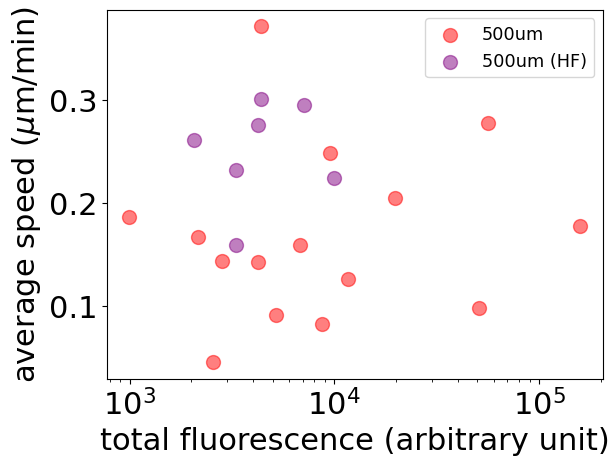

In [163]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = None# 'Exp 54'
for dat,xml,fluo,lab,color in zip((dat54_500um_high,dat54_500um_high_F5),
                             (tree54_500um_high,tree54_500um_high_F5),
                             (dat_fluo54_500um_high,dat_fluo54_500um_high_F5),
                             ('500um','500um (HF)'),
                             ('red','purple')):
    # if 'control' in lab:
    #     continue 
    #color = 'red'
    avg_speeds = get_avg_speed(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    max_fluo = get_max_fluo_track(dat,fluo_by_node)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)

    #valid_tracks = get_valid_tracks(dat) 
    valid_tracks = [len(x) > 1 for x in dat[1] ]
    #ax.scatter(max_fluo/avg_fluo,label=lab,s=100,alpha=0.5,color=color)
    ax.scatter(max_fluo[valid_tracks],avg_speeds[valid_tracks],label=lab,s=100,alpha=0.5,color=color)
    #ax.plot([0,10.],[0,10])
    ax.set_xlabel('total fluorescence (arbitrary unit)')
    ax.set_ylabel('average speed ($\mu$m/min)')
    ax.set_title(exp_label)
    
ax.legend(fontsize='xx-small')
ax.set_xscale('log')
#plt.savefig('plots/avg_speed_vs_fluorescence_exp54_500um_2colors.pdf',bbox_inches='tight')

# Division times 

Divisions are segerated into 3 types:
- `1` is a proper division (between two division)
- `0` is where no division occured
- `-1` if there is a division but the track either started at t=0 or hasn't divided before the end

## Individual experiments

Exp22 control 	 mean: 22.40492170022371 std: 16.601632120082147
Exp22 500um 	 mean: 54.043209876543216 std: 28.76145656838985
Exp33 control 	 mean: 27.140072436349673 std: 17.970356597061915
Exp33 500um 	 mean: 44.275750422187926 std: 23.187602704724252
Exp40 control 	 mean: 28.99 std: 18.292482062311826
Exp40 500um 	 mean: 52.666666666666664 std: 24.878711630582096


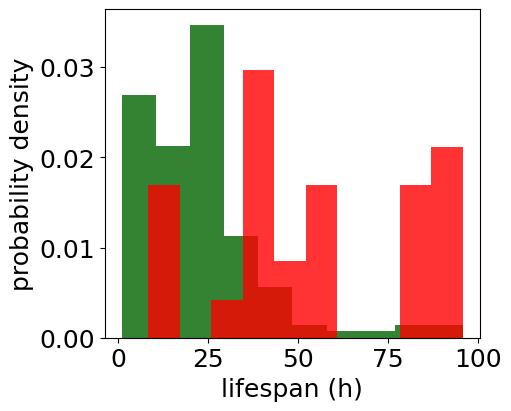

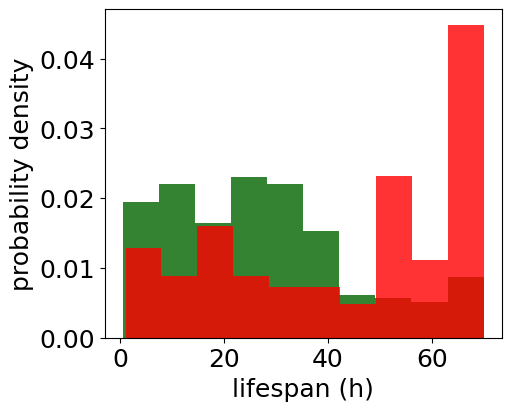

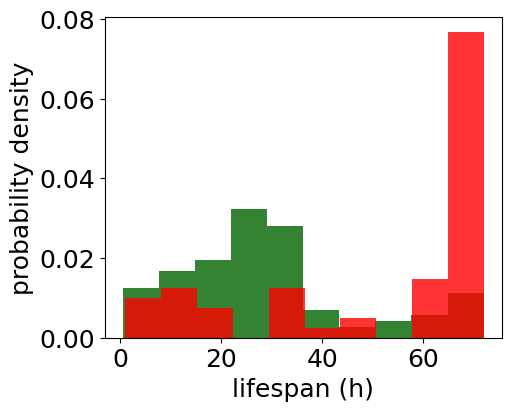

In [67]:

all_div_times,all_div_types = {},{} 
for i,(control,treated,tree_control,tree_treated,exp_label) in enumerate(zip( 
                                                  (dat22_control,dat33_control,dat40_control),  
                                                   (dat22_500um,dat33_500um,dat40_500um),
                                                    (tree22_control,tree33_control,tree40_control), 
                                                    (tree22_500um,tree33_500um,tree40_500um),
                                                   ('Exp22','Exp33','Exp40'))):
    fig,ax = plt.subplots(1,1,figsize=(5,4),layout='constrained',squeeze=False)

    for dat,tree,lab,color in zip((control,treated),(tree_control,tree_treated),('control','500um'),('darkgreen','red')
    ):
        div_times,div_types = get_div_times_lintree(dat)
        div_times  = div_times/60
        all_div_times[exp_label+'_'+lab] = div_times
        all_div_types[exp_label+'_'+lab] = div_types
        print('{} {} \t mean: {} std: {}'.format(exp_label,lab,div_times.mean(),div_times.std()))

        for j,lab_div_type,cnd in zip(range(2),['all',],[div_types > -2,div_types == 1]):
            ax[j][0].hist(div_times[cnd],label=exp_label+' '+lab,color=color,density=True,alpha=0.8)
            ax[j][0].set_xlabel('lifespan (h)')
            ax[j][0].set_ylabel('probability density') 
            #ax[j][i].set_title('replicate {}'.format(i+1))
        #ax[j][i].legend()
    plt.savefig('plots/histogram_lifespans_{}.svg'.format(exp_label));

## Pooled

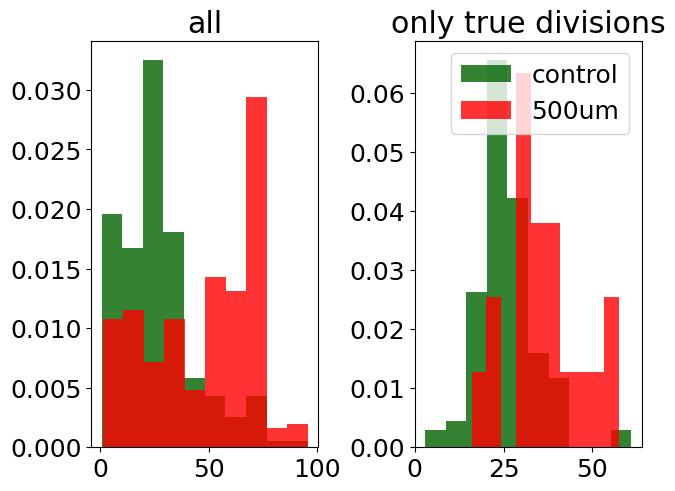

In [52]:
# Pool everything
fig, ax = plt.subplots(1,2,layout='constrained')

labs = all_div_times.keys()

all_control_times = np.concatenate([all_div_times[e] for e in labs if 'control' in e])
all_treated_times = np.concatenate([all_div_times[e] for e in labs if '500um' in e])
all_control_types = np.concatenate([all_div_types[e] for e in labs if 'control' in e])
all_treated_types = np.concatenate([all_div_types[e] for e in labs if '500um' in e])


for times,types,lab,color in zip( (all_control_times,all_treated_times),
                                  (all_control_types,all_treated_types),
                                  ('control','500um'),
                                  ('darkgreen','red')
                                ):
    for j,lab_div_type,cnd in zip(range(2),['all','only true divisions'],[types > -2,types == 1]):
        ax[j].hist(times[cnd ],label=lab,color=color,density=True,alpha=0.8)
        ax[j].set_title(lab_div_type)
    ax[j].legend()

### Export to pandas csv/pickle

In [283]:
def stack_padding(l,fillvalue):
    import itertools
    return np.column_stack((itertools.zip_longest(*l, fillvalue=fillvalue)))

all_div_times_pad = { k:v for k,v in zip(all_div_times.keys(),stack_padding(all_div_times.values(),np.NaN))}
all_div_types_pad = { k:v for k,v in zip(all_div_types.keys(),stack_padding(all_div_types.values(),np.NaN))}


/tmp/ipykernel_2914474/4256485490.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.column_stack((itertools.zip_longest(*l, fillvalue=fillvalue)))


In [284]:
df_times = pd.DataFrame.from_dict(all_div_times_pad)
df_types = pd.DataFrame.from_dict(all_div_types_pad)

In [285]:
df2 = pd.concat({'div time (h)':df_times,'div type':df_types },axis=1)

In [286]:
df2 = df2.swaplevel(0,1,axis=1).sort_index(axis=1)

In [287]:
df2

Exp22_500um          Exp22_control           Exp33_500um           \
    div time (h) div type  div time (h) div type div time (h) div type   
0      87.333333     -1.0     31.500000     -1.0     2.999779     -1.0   
1      30.333333     -1.0     42.666667      1.0    66.495111     -1.0   
2      95.833333      0.0     28.333333     -1.0    66.495111     -1.0   
3       9.333333     -1.0     28.333333     -1.0    69.994854      0.0   
4      86.333333     -1.0     19.833333     -1.0    69.994854      0.0   
..           ...      ...           ...      ...          ...      ...   
144          NaN      NaN     11.833333     -1.0          NaN      NaN   
145          NaN      NaN     11.833333     -1.0          NaN      NaN   
146          NaN      NaN     24.500000     -1.0          NaN      NaN   
147          NaN      NaN     39.500000      1.0          NaN      NaN   
148          NaN      NaN     31.500000     -1.0          NaN      NaN   

    Exp33_control           Exp40_500um          Exp40_control           
     div time (h) div type div time (h) div type  div time (h) div type  
0       28.499478     -1.0         41.0     -1.0          32.5      1.0  
1       40.499258     -1.0         30.5     -1.0          25.5     -1.0  
2       40.499258     -1.0         30.5     -1.0          25.5     -1.0  
3        8.499844     -1.0         72.0      0.0          58.5     -1.0  
4       60.998883     -1.0         50.0     -1.0          15.5     -1.0  
..            ...      ...          ...      ...           ...      ...  
144           NaN      NaN          NaN      NaN           NaN      NaN  
145           NaN      NaN          NaN      NaN           NaN      NaN  
146           NaN      NaN          NaN      NaN           NaN      NaN  
147           NaN      NaN          NaN      NaN           NaN      NaN  
148           NaN      NaN          NaN      NaN           NaN      NaN  

[149 rows x 12 columns]

In [ ]:
df2.to_csv('output_data/div_time_22-33-40.csv')
df2.to_pickle('output_data/div_time_22-33-40.pkl')

In [15]:
def get_speed_tracks_v2(dat,bins):
    max_time = max([max(t) for t in dat[1]]) 
    min_time = min([min(t) for t in dat[1]])
    times = np.arange(0,int(max_time+bins),bins)
    speeds = get_speed(dat)
    speeds_binned = [[] for _ in range(len(times))]
    cnt_time = np.zeros((len(times)))
    for speed,time in zip(speeds,dat[1]):
        #speed_time[(time[:-1]/(step*bins)).astype(int).tolist()] += speed
        time_binned = (time[:-1]/bins).astype(int).tolist()
        for j,tbin in enumerate(time_binned):  
            speeds_binned[tbin].append(speed[j])         
            cnt_time[tbin] += 1
    return [np.mean(e) for e in speeds_binned],[np.std(e)/np.sqrt(e2) for e,e2 in zip(speeds_binned,cnt_time)], times 
 

In [16]:
def bin_xy_data(data,qx=0.33): 
    # data in the form of a list of pairs of lists [x] and [y] of coordinates
    xx,yy=[[]],[[]]
    for d in data:
        x,y=d
        for i in range(0,len(x)):
            j=int(x[i]/qx)
            if (j<len(xx)):
                yy[j].append(y[i])
                xx[j].append(x[i])
            else:
                yy.append([])
                xx.append([])
    return [np.mean(x) for x in xx],[np.mean(y) for y in yy],[np.std(y)/np.sqrt(len(y)) for y in yy]
    

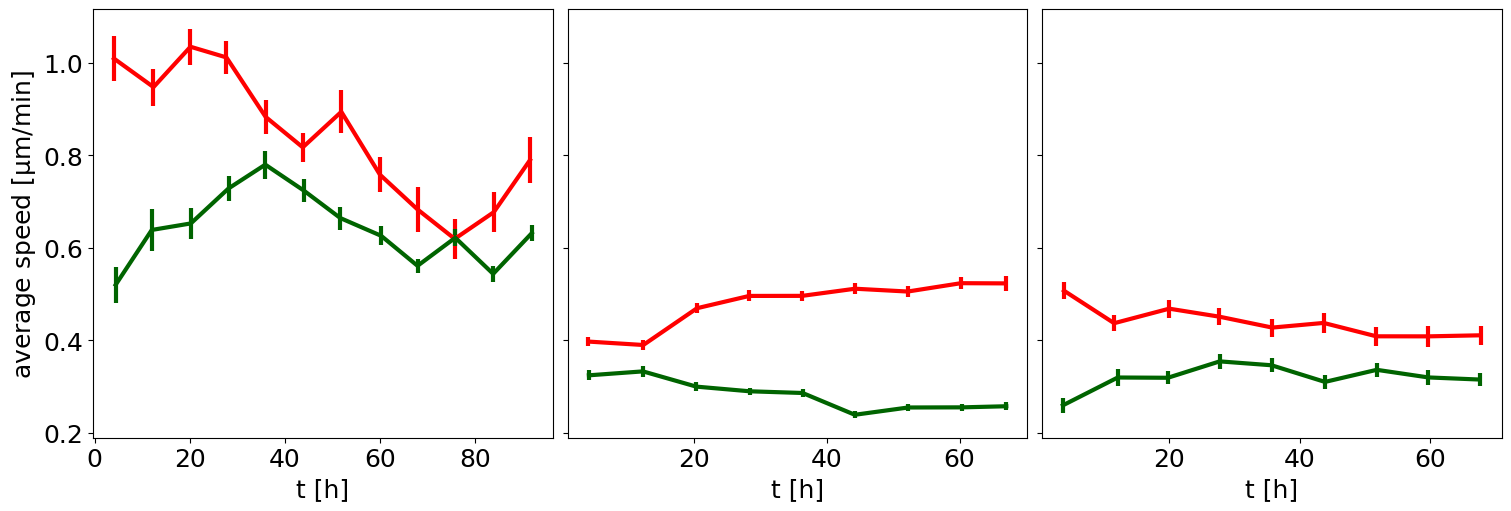

In [20]:
from track_fns import bin_xy_data

fig , ax = plt.subplots(1,3,figsize=(15,5),layout='constrained',sharey=True)
for i,(dat,lab) in enumerate( (                 
                (dat22_500um, 'e22500um'), (dat22_control, 'e22control'),
                (dat33_500um, 'e33500um'), (dat33_control, 'e33econtrol'),
                (dat40_500um, 'e40500um'),(dat40_control, 'e40control'))
                  ):
    times = dat[1]
    vels = get_speed(dat)
    tracks_pos = [ [t[:-1],v] for t,v in zip(times,vels)]
    # qx is bin size in mins
    x,y,e = bin_xy_data(tracks_pos,qx=8*60)
    ax[i//2].errorbar(np.array(x)/60,y,e,lw=3,label=lab,color='red' if '500um' in lab else 'darkgreen')
    
#plt.legend(fontsize=10)
    ax[i//2].set_xlabel('t [h]')
    ax[0].set_ylabel('average speed [$\mathrm{\mu}$m/min]')

#plt.savefig('/mnt/dioscuri-nas/Ilyas/avg_speed_vs_time.svg')

/home/idjafc/Notebooks/Cells/Tracking/../utils/track_fns.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(speeds)
/tmp/ipykernel_295889/1415324511.py:15: RuntimeWarning: invalid value encountered in divide
  return speed_time/cnt_time,times


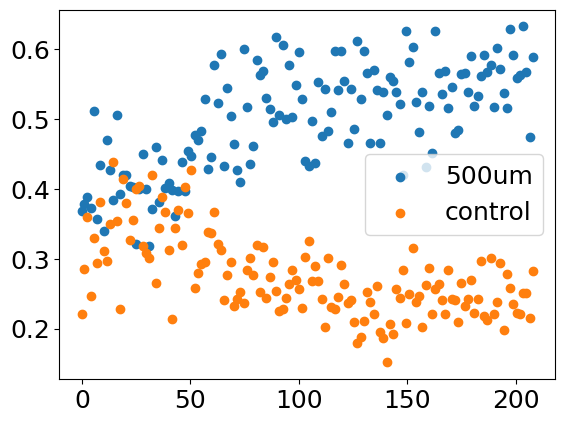

In [685]:
for dat,lab in ((dat33_500um, '500um'), (dat33_control, 'control')):
    speed,time = get_speed_tracks_v2(dat,step=30,bins=8)
    idxs_valid = np.isfinite(speed)
    speed,time = speed[idxs_valid],time[idxs_valid]
    #speed = moving_average(speed,10)
    #time = moving_average(time,10)
    bin_size = 8*60
    for 
    plt.scatter(time/60,speed,label=lab)
plt.legend()

In [705]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [713]:
for dat,lab in ((dat33_500um, '500um'), (dat33_control, 'control')):
    speed,time,speeds_binned,cnts = get_speed_tracks_v2(dat,step=30)
    idxs_valid = np.isfinite(speed)
    #speed,time = speed[idxs_valid],time[idxs_valid]
    #speed = moving_average(speed,10)
    #time = moving_average(time,10)
    err = [np.std(v)/c for v,c in zip(speeds_binned,cnt) ]
    plt.errorbar(time/60,speed,err,label=lab)
plt.legend()
plt.xticks([x for x in range(0,73,24)])

/home/idjafc/Notebooks/Cells/Tracking/../utils/track_fns.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(speeds)


IndexError: list index out of range

## Trees visualisation

In [543]:
dat33_control,tree33_control = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/01_Control-1_23054.xml',remove_spurious=False)


01_Control-1_23054.xml
time step: 1799.967041015625 sec pixel size: [0.66917518 0.66917518] um
#tracks: 165, ( 4 <  5 timepoints)


## Tree with deaths and births marked

In [127]:
from ete3 import TreeStyle,NodeStyle
from ete3 import Tree
dat33_control,tree33_control = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/01_Control-1_27054.xml',remove_spurious=True)
ete_tree = create_tree_ete3(tree33_control,None,None)

for t1 in ete_tree.get_children():
    div_times,div_nodes = get_div_times(t1)
    death_times,death_nodes = get_death_times(t1)
    if death_nodes: 
        break

t2 = ete_tree.get_children()[2]

subtree = Tree()
subtree.add_child(t1)
subtree.add_child(t2)

div_times,div_nodes = get_div_times(subtree)
death_times,death_nodes = get_death_times(subtree)


ts = TreeStyle()
ts.scale =  0.5
ts.show_leaf_name = False         
ts.show_branch_length = False
ts.show_branch_support = False
ts.show_scale = False
ts.branch_vertical_margin = 13.0
for n in subtree.traverse('postorder'):
    node_id = n.name
    c = 0.0
    nstyle = NodeStyle()
    nstyle["shape"] = "sphere"
    nstyle["size"] = 0
    nstyle["fgcolor"] = '#008800'
    nstyle["hz_line_width"] = 3.0
    nstyle["vt_line_type"] = 0
    nstyle['hz_line_color'] = '#008800'
    nstyle['vt_line_color'] = '#008800'
    nstyle["size"] = 0
    if n in div_nodes: 
        nstyle["shape"] = "circle"
        nstyle["size"] = 5
        nstyle["fgcolor"] = '#0000FF' #color_ascii

        #nstyle["fgcolor"] = '#FFFF00' #color_ascii
    elif n in death_nodes: 
        cnd = True
        #nstyle = NodeStyle()
        nstyle["shape"] = "square"
        nstyle["size"] = 5
        nstyle["fgcolor"] = '#FF0000' #color_ascii
    if node_id == 'root': 
        continue
        
    n.set_style(nstyle)


subtree.render('tree_wdeath_and_branches.svg',tree_style=ts,w=500);
#subtree.render('%%inline',tree_style=ts,w=500);


01_Control-1_27054.xml
time step: 1799.967041015625 sec pixel size: [0.66917518 0.66917518] um
removed 0 spurious tracks out of  5 suspicious ones 
#tracks: 335, ( 20 <  5 timepoints)


## Full tree

In [ ]:
from ete3 import TreeStyle,NodeStyle
ts = TreeStyle()
ts.scale =  0.5
ts.show_leaf_name = False
ete_tree = create_tree_ete3(tree33_control,None,None)
div_times,div_nodes = get_div_times(ete_tree)
death_times,death_nodes = get_death_times(ete_tree)

#subtree =ete_tree.copy()#.get_children()[2]
#tree = Tree()
subtree = ete_tree.get_children()[1]
#subtree = sue_btree.add_child(ete_tree.get_children()[12])
for n in ete_tree.traverse('postorder'):
    n.img_style["size"] = 0 #this is required to ensure properly sized branches
    n.img_style["hz_line_width"] = 1.0
    #c=pow(node_to_vel[node.name]/max_vel,0.7)
    node_id = n.name
    c = 0.0

    nstyle = NodeStyle()
    nstyle["shape"] = "sphere"
    nstyle["size"] = 0
    nstyle["fgcolor"] = color_ascii
   
    if n in div_nodes: 
        #color_ascii = 
        #nstyle = NodeStyle()
        #nstyle["shape"] = "sphere"
        #nstyle["size"] = 10
        nstyle["fgcolor"] = '#FFFF00' #color_ascii
    elif n in death_nodes: 
        # color_ascii = '#00FF00'
        # nstyle = NodeStyle()
        # nstyle["shape"] = "sphere"
        # nstyle["size"] = 10
        # nstyle["fgcolor"] = color_ascii
        # n.set_style(nstyle)
        nstyle["fgcolor"] = '#00FF00' #color_ascii

    else: 
        color_ascii = '#0000FF'
        
    if node_id == 'root': 
        continue
        
    nstyle['hz_line_color'] = '#008800'
    #n.set_style(nstyle)

    #color_ascii = '#%02x%02x%02x' % (int(255*c), 0, int(255*(1-c)))
    n.img_style['hz_line_color'] = '#008800' #color_ascii
    

#ete_tree.render(f'./plots/tree_fluo_{exp_label}_{lab}.pdf',tree_style=ts,h=1000)   
    
ts.show_branch_length = False
ts.show_branch_support = False
ts.show_scale = False
ts.branch_vertical_margin = 5.0
#ete_tree.render('%%inline',tree_style=ts,w=500)
ete_tree.render('/mnt/dioscuri-nas/Ilyas/full_tree.png',tree_style=ts,w=500)

# plot_tree(tree33_500um)
# plt.show()

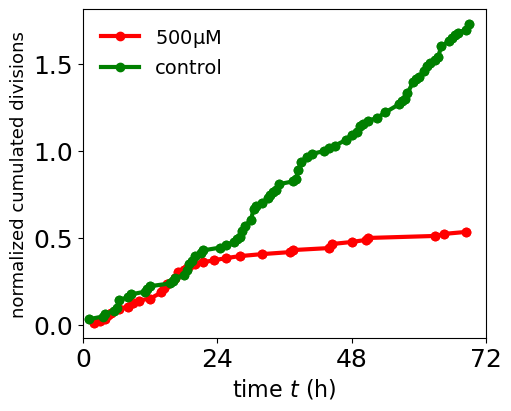

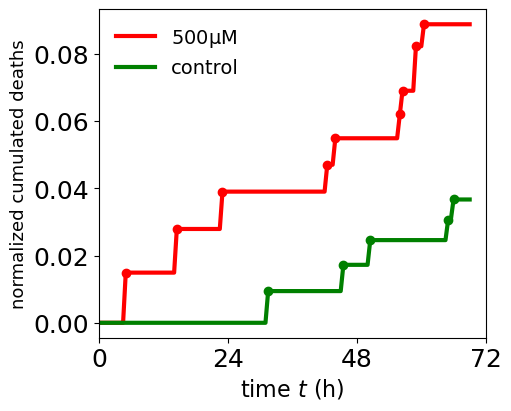

In [66]:

def get_div_times(tree):
    nodes = tree.get_leaves()
    div_times,div_nodes = [],[]
    while(len(nodes) > 0):
        n = nodes.pop()
        #print(n.name)
        for n2 in n.get_ancestors():
            if n2.get_sisters():
                ancestor = n.get_common_ancestor(n2.get_sisters())
                dist = ancestor.get_distance(tree.get_tree_root())
                if (ancestor not in div_nodes) and (dist > 1.0):
                    div_times.append(dist-1.0)
                    div_nodes.append(ancestor)
                    nodes.append(ancestor)
                break
    return div_times,div_nodes


def get_death_times(tree):
    death_times = [] 
    death_nodes = [] 
    max_dist = 1.0
    for n in tree.traverse('postorder'):
        max_dist = max(max_dist,n.get_distance(tree.get_tree_root()))
    
    for n in tree.get_leaves():
        dist =  n.get_distance(tree.get_tree_root())
        if dist != max_dist:
            #print(dist)
            death_times.append(dist-1.0)
            death_nodes.append(n)
    return death_times,death_nodes


def get_pop_times(tree):
    ''' gets the population, assuming that '''
    pop_times = [] 
    
    for n in tree.traverse('postorder'):
        dist =  n.get_distance(tree.get_tree_root())
        pop_times.append(dist-1.0)
    return pop_times

plt.rcParams['text.usetex'] = False
exp_duration = 72
delta_time = 0.5 # step time in hours
exp_label = 'E33'
for i in range(2):
    fig,ax = plt.subplots(1,1,figsize=(5,4),layout='constrained')
    for tree,lab,c in ((tree33_500um,r'500$\mathrm{\mu}$M','red'),(tree33_control,'control','green')):
    
        etree = create_tree_ete3(tree,None,None)

        #print(p)
        #ax[0].plot(x,yfit,'--',lw=3,label='b={:.1e} $\pm$ {:.1e}'.format(p[1],linregress(x,y).stderr),color=c)
        #print(''.center(20,'-'))
        ticks = range(0,exp_duration+1,24)
        ax.set_xticks(ticks)
        
        if i == 0:
            div_times, _ = get_div_times(etree)
            time, ndiv_time = np.unique(div_times, return_counts=True)
            time = time.astype(int)
            all_times = np.arange(time.max()+1)
            ndiv_all_time = np.zeros_like(all_times)
            ndiv_all_time[time] = ndiv_time
            
            n0 = len(etree.get_children())
            x,y = time*0.5,np.cumsum(ndiv_time)/n0
            #ax[0].plot(x,y,'-o',lw=3,label=lab,color=c)
            
            p = np.polyfit(x,y,deg=2) # assuming N(t) = N0(1+bt), p[1] = b*n0
            yfit = (p[0]+p[1]*x)#
            
            ax.scatter(x,y,color=c)
            ax.plot(x,y,'-o',lw=3,label=lab,color=c)
        
        # print(''.center(20,'-'))
        # pop_times = get_pop_times(etree)
        # time, npop_time = np.unique(pop_times, return_counts=True)
        # ax[2].plot(time* delta_time,npop_time,label=lab,color=c)    
            
            ax.set_xlabel('time $t$ (h)',fontsize=16)
            ax.set_ylabel("normalized cumulated divisions",fontsize=13)
            ax.legend(frameon=False,fontsize=14)
            ax.set_xlim(0,exp_duration)
            plt.savefig(f'cumulative_births_{exp_label}.svg')
        
        else:
            death_times,_ = get_death_times(etree)
            time, ndeath_time = np.unique(death_times, return_counts=True)
            time = time.astype(int)
            ndeath_all_time = np.zeros_like(all_times)
            ndeath_all_time[time] = ndeath_time.astype(int)
            tot_pop_all_time = n0+np.cumsum(ndiv_all_time)
            #ax[1].plot(all_times*delta_time,np.cumsum(ndeath_all_time)/tot_pop_all_time,'--',lw=3,label=lab,color=c)
            x,y = (all_times*delta_time) [time], np.cumsum(ndeath_all_time/tot_pop_all_time)[time]

            ax.plot(all_times*delta_time,np.cumsum(ndeath_all_time/tot_pop_all_time),'-',lw=3,label=lab,color=c)
            ax.scatter(x,y,color=c)

            ax.set_xlabel('time $t$ (h)',fontsize=16)
            ax.set_ylabel("normalized cumulated deaths",fontsize=13)#,fontdict={'size':16})
            ax.legend(frameon=False,fontsize=14)
            ax.set_xlim(0,exp_duration)
            ax.set_xticks(ticks)
            plt.savefig(f'cumulative_deaths_{exp_label}.svg')
        
  

# What really is this fluorescence ?

In [14]:
from  numpy import ma # .MaskedArray

In [22]:
np.sum(fluo[4096]['crop'].mask), np.sum(~fluo[4096]['crop'].mask)

(246776, 3224)

In [34]:
dat54_500um_hf[2][0][-1]

6247

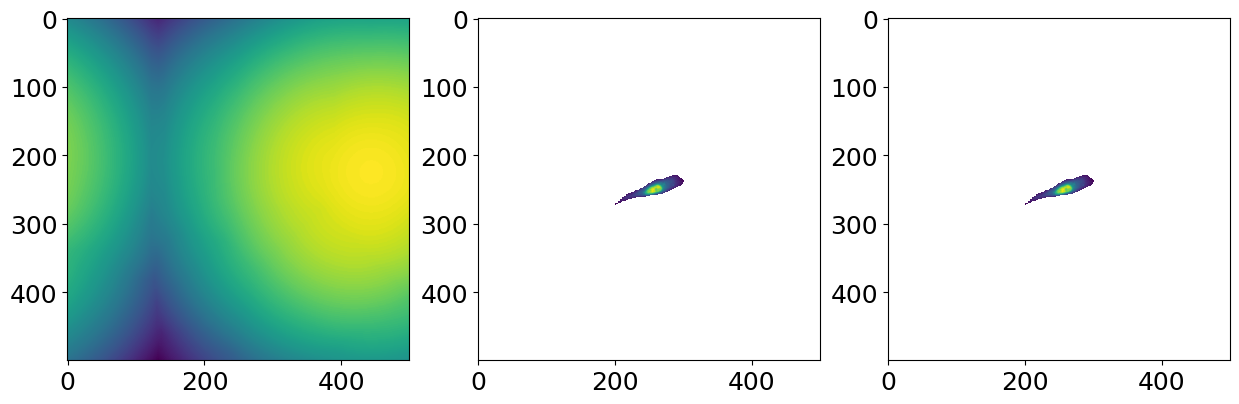

In [39]:
plt.figure(figsize=(15,5))
ax = plt.subplot(131)
fluo = fluos_500um_hf
node_id = 6247
ax.imshow(fluo[node_id]['fit_background'])
ax = plt.subplot(132)
ax.imshow(fluo[node_id]['crop'])
ax = plt.subplot(133)
ax.imshow(fluo[node_id]['crop']/fluo[node_id]['fit_background'])
